### Student Information
Name: 洪幸里

Student ID: 111164512

GitHub ID: shing-li

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

# Table of Contents
1. First
2. Second
3. Third
    - meaningful data visualization
    - TF-IDF
    - Naive Bayes classifier
4. Fourth
5. Fifth

# First

The first homework question is in another repository, below is the link.  
https://github.com/shing-li/DM2022-Lab1-Master

# Second

In [2]:
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

In [3]:
a = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', sep="\t", header=None)
a.columns = ['sentence', 'score']
b = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', sep="\t", header=None)
b.columns = ['sentence', 'score']
c = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', sep="\t", header=None)
c.columns = ['sentence', 'score']
X = pd.concat([a,b,c], axis=0, ignore_index=True)
X

sentence  score
0     So there is no way for me to plug it in here i...      0
1                           Good case, Excellent value.      1
2                                Great for the jawbone.      1
3     Tied to charger for conversations lasting more...      0
4                                     The mic is great.      1
...                                                 ...    ...
2743  I think food should have flavor and texture an...      0
2744                           Appetite instantly gone.      0
2745  Overall I was not impressed and would not go b...      0
2746  The whole experience was underwhelming, and I ...      0
2747  Then, as if I hadn't wasted enough of my life ...      0

[2748 rows x 2 columns]

### Exercise 1

In [4]:
# Answer here
for target in X['sentence'][:3]:
    print(target)
    print('='*100)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [5]:
# create new column
a = ['Positive', 'Negative']
def format_labels(target):
    """ format the labels """
    if target == 1:
        return a[0]
    else:
        return a[1]
X['score_2'] = X.score.apply(lambda t: format_labels(t))
X

sentence  score   score_2
0     So there is no way for me to plug it in here i...      0  Negative
1                           Good case, Excellent value.      1  Positive
2                                Great for the jawbone.      1  Positive
3     Tied to charger for conversations lasting more...      0  Negative
4                                     The mic is great.      1  Positive
...                                                 ...    ...       ...
2743  I think food should have flavor and texture an...      0  Negative
2744                           Appetite instantly gone.      0  Negative
2745  Overall I was not impressed and would not go b...      0  Negative
2746  The whole experience was underwhelming, and I ...      0  Negative
2747  Then, as if I hadn't wasted enough of my life ...      0  Negative

[2748 rows x 3 columns]

In [6]:
X[:10][['sentence', 'score_2']]

sentence   score_2
0  So there is no way for me to plug it in here i...  Negative
1                        Good case, Excellent value.  Positive
2                             Great for the jawbone.  Positive
3  Tied to charger for conversations lasting more...  Negative
4                                  The mic is great.  Positive
5  I have to jiggle the plug to get it to line up...  Negative
6  If you have several dozen or several hundred c...  Negative
7        If you are Razr owner...you must have this!  Positive
8                Needless to say, I wasted my money.  Negative
9                   What a waste of money and time!.  Negative

In [7]:
X.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

### Exercise 2

In [8]:
# Answer here
X.query('score==1')[:10]

sentence  score   score_2
1                         Good case, Excellent value.      1  Positive
2                              Great for the jawbone.      1  Positive
4                                   The mic is great.      1  Positive
7         If you are Razr owner...you must have this!      1  Positive
10                    And the sound quality is great.      1  Positive
11  He was very impressed when going from the orig...      1  Positive
13                           Very good quality though      1  Positive
15  Highly recommend for any one who has a blue to...      1  Positive
17                                   So Far So Good!.      1  Positive
18                                      Works great!.      1  Positive

### Exercise 3

In [9]:
# Answer here
X[X['score_2']=='Negative'][::10][:10]

sentence  score   score_2
0    So there is no way for me to plug it in here i...      0  Negative
20   I went on Motorola's website and followed all ...      0  Negative
37                         Poor Talk Time Performance.      0  Negative
60   Essentially you can forget Microsoft's tech su...      0  Negative
83                      The battery runs down quickly.      0  Negative
104  I received my supposedly new motorola 375 and ...      0  Negative
134                       Buyer--Be Very Careful!!!!!.      0  Negative
148  Items stated as included from the description ...      0  Negative
169  One thing I hate is the mode set button at the...      0  Negative
186                                      Design Flaw?.      0  Negative

In [10]:
X.isnull()

sentence  score  score_2
0        False  False    False
1        False  False    False
2        False  False    False
3        False  False    False
4        False  False    False
...        ...    ...      ...
2743     False  False    False
2744     False  False    False
2745     False  False    False
2746     False  False    False
2747     False  False    False

[2748 rows x 3 columns]

In [11]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                              score_2  
0  The amoung of missing records is:   
1                                   0

### Exercise 4

In [12]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [13]:
# add NaN value
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])
dummy_series.to_frame()
dummy_series.to_frame().T

sentence score
0  dummy_record     1

In [14]:
X = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
X

sentence score   score_2
0     So there is no way for me to plug it in here i...     0  Negative
1                           Good case, Excellent value.     1  Positive
2                                Great for the jawbone.     1  Positive
3     Tied to charger for conversations lasting more...     0  Negative
4                                     The mic is great.     1  Positive
...                                                 ...   ...       ...
2744                           Appetite instantly gone.     0  Negative
2745  Overall I was not impressed and would not go b...     0  Negative
2746  The whole experience was underwhelming, and I ...     0  Negative
2747  Then, as if I hadn't wasted enough of my life ...     0  Negative
2748                                       dummy_record     1       NaN

[2749 rows x 3 columns]

In [15]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                              score_2  
0  The amoung of missing records is:   
1                                   1

In [16]:
X.dropna(inplace=True)

In [17]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                              score_2  
0  The amoung of missing records is:   
1                                   0

In [18]:
len(X)

2748

### Exercise 5

In [19]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]
# Answer here
'''
id=A: np.nan為numpy函式庫定義的非值(Not a Number)，所以isnull()可以檢查到，return True
id=B: 這個欄位沒有填任何值，因此直接被程式判斷為非值，所以isnull()可以檢查到，return True
id=C: 'NaN'為字串，其中也沒有跳脫字元，因此裡面的內容是有意義的，不等於系統認定的NaN，所以isnull()無法檢查到，return False
id=D: 'None'為字串，其中也沒有跳脫字元，因此裡面的內容是有意義的，不等於系統認定的None，所以isnull()無法檢查到，return False
id=E: None為python預設的非值，所以isnull()可以檢查到，return True
id=F: ''為字串，其中也沒有跳脫字元，因此裡面的內容是有意義的，不等於系統認定的非值，所以isnull()無法檢查到，return False
'''

"\nid=A: np.nan為numpy函式庫定義的非值(Not a Number)，所以isnull()可以檢查到，return True\nid=B: 這個欄位沒有填任何值，因此直接被程式判斷為非值，所以isnull()可以檢查到，return True\nid=C: 'NaN'為字串，其中也沒有跳脫字元，因此裡面的內容是有意義的，不等於系統認定的NaN，所以isnull()無法檢查到，return False\nid=D: 'None'為字串，其中也沒有跳脫字元，因此裡面的內容是有意義的，不等於系統認定的None，所以isnull()無法檢查到，return False\nid=E: None為python預設的非值，所以isnull()可以檢查到，return True\nid=F: ''為字串，其中也沒有跳脫字元，因此裡面的內容是有意義的，不等於系統認定的非值，所以isnull()無法檢查到，return False\n"

In [20]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [21]:
sum(X.duplicated())

17

In [22]:
X.drop_duplicates(keep=False, inplace=True)  # drop duplicate data

In [23]:
sum(X.duplicated())

0

In [24]:
X_sample = X.sample(n=1000) # sampling

In [25]:
X_sample[0:4]

sentence score   score_2
2168  From what my dinner companions told me...every...     1  Positive
75                                   Love this product.     1  Positive
1598                      She carries the movie well.       1  Positive
149   After 3 months, screen just went black all of ...     0  Negative

### Exercise 6

In [26]:
# Answer here
print('Orignal X: ')
print('length of X: '+str(len(X)))
print(X[:10])
print(len(X))
print('='*100)
X2 = X.sample(n=1000, random_state=21)
print('X that after sampling: ')
print('length of X: '+str(len(X)))
print(X[:10])
print('-'*100)
print('X2 ')
print('length of X2: '+str(len(X2)))
print(X2[:10])

'''
sample不會影響原本dataframe的值，因此需要將sample return的內容賦予新的dataframe，以上面的例子來說就是X2
'''

Orignal X: 
length of X: 2714
                                            sentence score   score_2
0  So there is no way for me to plug it in here i...     0  Negative
1                        Good case, Excellent value.     1  Positive
2                             Great for the jawbone.     1  Positive
3  Tied to charger for conversations lasting more...     0  Negative
4                                  The mic is great.     1  Positive
5  I have to jiggle the plug to get it to line up...     0  Negative
6  If you have several dozen or several hundred c...     0  Negative
7        If you are Razr owner...you must have this!     1  Positive
8                Needless to say, I wasted my money.     0  Negative
9                   What a waste of money and time!.     0  Negative
2714
X that after sampling: 
length of X: 2714
                                            sentence score   score_2
0  So there is no way for me to plug it in here i...     0  Negative
1                        G

'\nsample不會影響原本dataframe的值，因此需要將sample return的內容賦予新的dataframe，以上面的例子來說就是X2\n'

1    1366
0    1348
Name: score, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

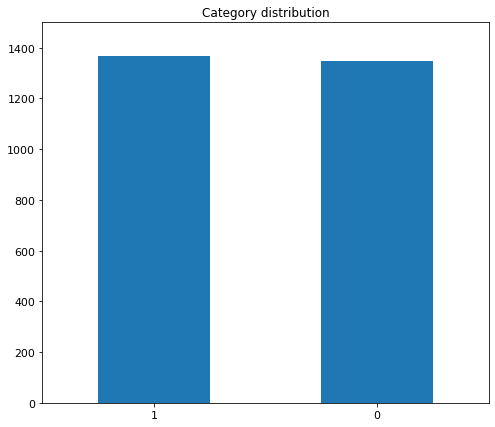

In [27]:
print(X.score.value_counts())

X.score.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1500],        
                                    rot = 0, fontsize = 11, figsize = (8,7)) # rot means rotation

#X.score.value_counts().plot.bar()

0    517
1    483
Name: score, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

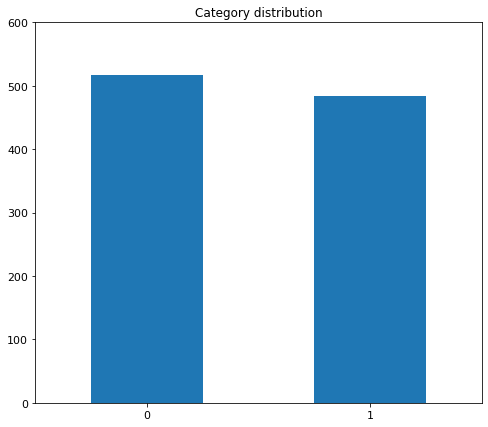

In [28]:
print(X_sample.score.value_counts())

X_sample.score.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 600],        
                                    rot = 0, fontsize = 11, figsize = (8,7)) # rot means rotation

### Exercise 7

1    1366
0    1348
Name: score, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

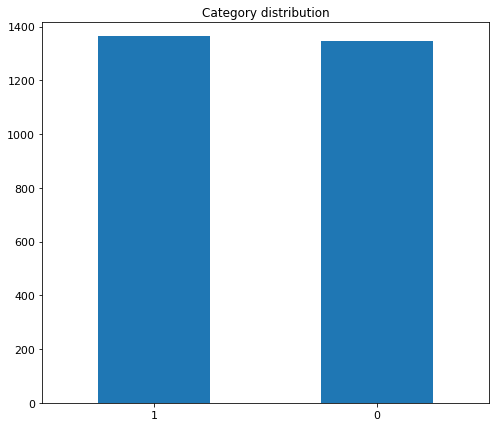

In [29]:
# Answer here
print(X.score.value_counts())
upper = max(X.score.value_counts()) + 50

X.score.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper],        
                                    rot = 0, fontsize = 11, figsize = (8,7)) # rot means rotation

### Exercise 8

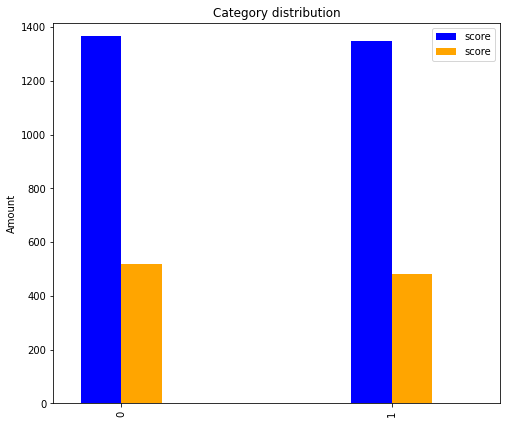

In [30]:
# Answer here
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # 畫兩個圖

width = 0.15
upper_bound = max(X.score.value_counts()) + 50

X.score.value_counts().plot(kind='bar', color='blue', ax=ax, width=width, position=1, 
                                    figsize = (8,7), title = 'Category distribution', 
                                    ylim = [0, upper_bound], legend=True)
X_sample.score.value_counts().plot(kind='bar', color='orange', width=width, position=0, legend=True)

ax.set_ylabel('Amount')


plt.show()

In [31]:
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))
X

sentence score   score_2  \
0     So there is no way for me to plug it in here i...     0  Negative   
1                           Good case, Excellent value.     1  Positive   
2                                Great for the jawbone.     1  Positive   
3     Tied to charger for conversations lasting more...     0  Negative   
4                                     The mic is great.     1  Positive   
...                                                 ...   ...       ...   
2743  I think food should have flavor and texture an...     0  Negative   
2744                           Appetite instantly gone.     0  Negative   
2745  Overall I was not impressed and would not go b...     0  Negative   
2746  The whole experience was underwhelming, and I ...     0  Negative   
2747  Then, as if I hadn't wasted enough of my life ...     0  Negative   

                                               unigrams  
0     [So, there, is, no, way, for, me, to, plug, it...  
1                  [Good, case, ,, Excellent, value, .]  
2                         [Great, for, the, jawbone, .]  
3     [Tied, to, charger, for, conversations, lastin...  
4                              [The, mic, is, great, .]  
...                                                 ...  
2743  [I, think, food, should, have, flavor, and, te...  
2744                     [Appetite, instantly, gone, .]  
2745  [Overall, I, was, not, impressed, and, would, ...  
2746  [The, whole, experience, was, underwhelming, ,...  
2747  [Then, ,, as, if, I, had, n't, wasted, enough,...  

[2714 rows x 4 columns]

In [32]:
X[0:10]["unigrams"] # 斷詞

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
5    [I, have, to, jiggle, the, plug, to, get, it, ...
6    [If, you, have, several, dozen, or, several, h...
7    [If, you, are, Razr, owner, ..., you, must, ha...
8      [Needless, to, say, ,, I, wasted, my, money, .]
9         [What, a, waste, of, money, and, time, !, .]
Name: unigrams, dtype: object

In [33]:
list(X[:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [34]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix
print(X_counts[0]) # 第0筆，位置，次數

  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1


In [35]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### Exercise 9

In [36]:
# Answer here
analyze = count_vect.build_analyzer()
analyze(X.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [37]:
X_counts.shape

(2714, 5153)

In [38]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [39]:
X_counts[20:25, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### Exercise 10

In [40]:
# Answer here
index = 0
store = []
for i in X_counts[20:21, 0:100].toarray()[0]:
    if i == 1:
        #print(i)
        store.append(index)
    index += 1
#print(store)
for i in store:
    print('index '+str(i)+' is: '+count_vect.get_feature_names_out()[i])

index 80 is: absolutely


In [41]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

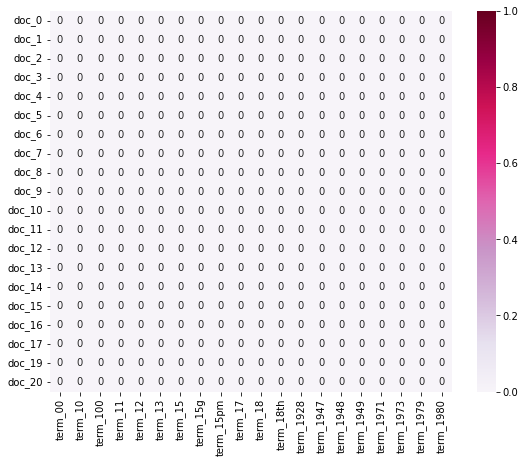

In [42]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
#print(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Exercise 11

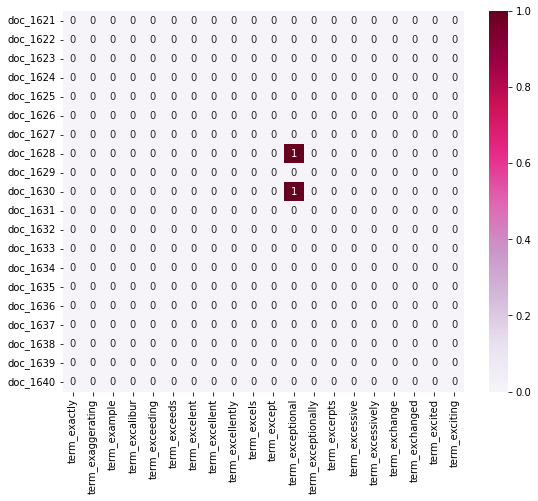

In [43]:
# Answer here

# 用random library去隨機選資料的其中一段，再把選到的畫出來，每次都會選到隨機不同的起始位置

import seaborn as sns
import random
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence)
#print(X_counts)
r1 = random.randint(0, 2748)
r2 = r1 + 20
plot_x2 = ["term_"+str(i) for i in count_vect.get_feature_names_out()[r1:r2]]
plot_y2 = ["doc_"+ str(i) for i in list(X.index)[r1:r2]]
#plot_z = X_counts[0:20, 0:20].toarray()
plot_z2 = X_counts[r1:r2, r1:r2].toarray()

plot_z2


# #plot_z2_sample = plot_z2.sample(n=20)
# #print(plot_z2_sample[170])

# plot_z2 = plot_z2.replace(np.nan,0)
df_todraw = pd.DataFrame(plot_z2, columns=plot_x2, index=plot_y2)
#print(plot_z2_sample)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


In [44]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

(2714, 2)

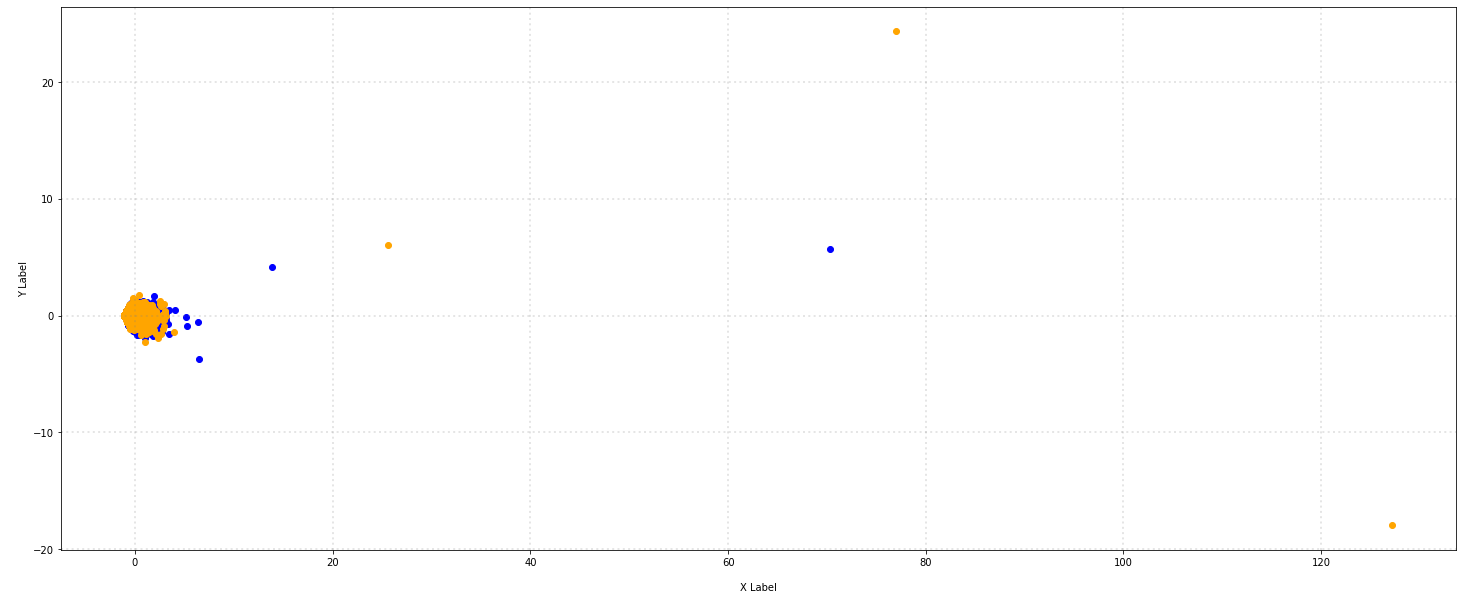

In [45]:
col = ['blue', 'orange']
cat = ['Positive', 'Negative']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, cat):
    xs = X_reduced[X['score_2'] == category].T[0]
    #print(xs)
    ys = X_reduced[X['score_2'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### Exercise 12

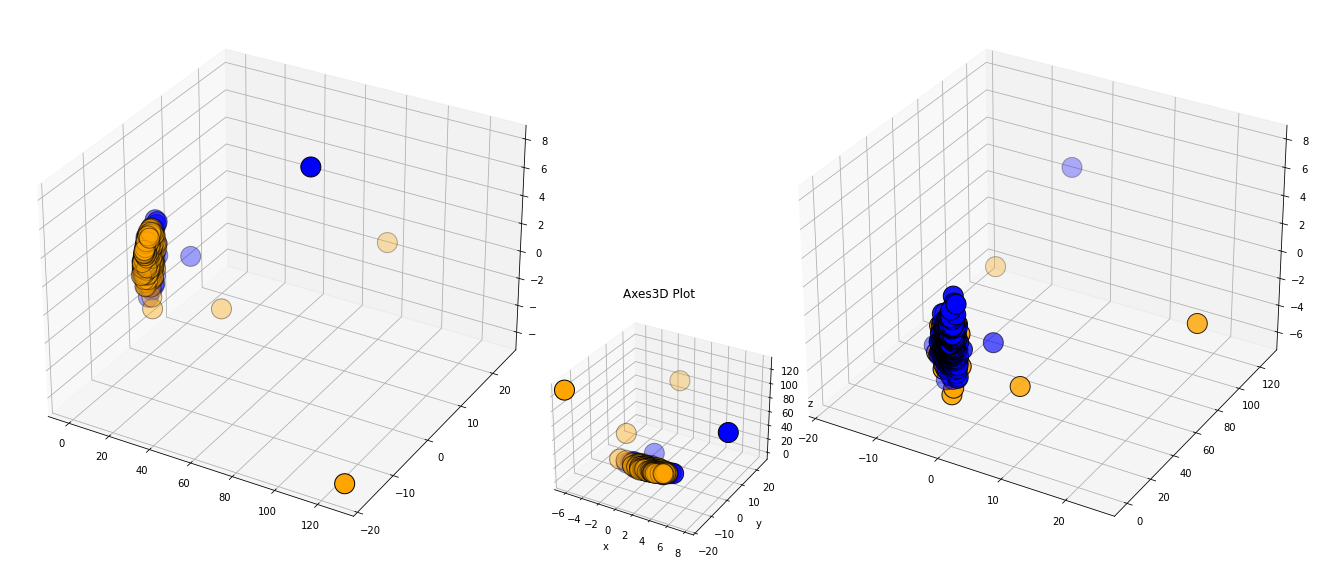

In [46]:
# Answer here
# 把資料xyz做轉置

from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
fig = plt.figure(1, figsize=(25, 10))
#ax = Axes3D(fig, elev=-150, azim=110)
ax = fig.add_subplot(1, 2, 1, projection='3d')
for c, category in zip(col, cat):
    xs = X_reduced[X['score_2'] == category].T[0]
    ys = X_reduced[X['score_2'] == category].T[1]
    zs = X_reduced[X['score_2'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c,
               cmap=plt.cm.Set1, edgecolor='k', s=400)
ax = fig.add_subplot(1, 2, 2, projection='3d')
for c, category in zip(col, cat):
    xs = X_reduced[X['score_2'] == category].T[1]
    ys = X_reduced[X['score_2'] == category].T[0]
    zs = X_reduced[X['score_2'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c,
               cmap=plt.cm.Set2, edgecolor='k', s=400)
ax = fig.add_subplot(2, 1, 2, projection='3d')
for c, category in zip(col, cat):
    #ax.scatter(X_reduced[:, 2], X_reduced[:, 0], X_reduced[:, 1], c=c,
    xs = X_reduced[X['score_2'] == category].T[2]
    ys = X_reduced[X['score_2'] == category].T[1]
    zs = X_reduced[X['score_2'] == category].T[0]
    ax.scatter(xs, ys, zs, c=c,
                cmap=plt.cm.Set1, edgecolor='k', s=400)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Axes3D Plot')
plt.show()

In [47]:
term_frequencies = []
for j in range(0,X_counts.shape[0]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies

[array([1]),
 array([34]),
 array([3]),
 array([2]),
 array([4]),
 array([3]),
 array([3]),
 array([1]),
 array([1]),
 array([2]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([9]),
 array([1]),
 array([2]),
 array([1]),
 array([1]),
 array([2]),
 array([1]),
 array([1]),
 array([1]),
 array([2]),
 array([1]),
 array([7]),
 array([1]),
 array([1]),
 array([3]),
 array([1]),
 array([1]),
 array([1]),
 array([5]),
 array([1]),
 array([1]),
 array([1]),
 array([2]),
 array([1]),
 array([1]),
 array([4]),
 array([1]),
 array([3]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([2]),
 array([1]),
 array([1]),
 array([1]),
 array([2]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([7]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([5]),
 array([4]),
 array([1]),
 array([85]),
 array([7]

In [48]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies

array([ 1, 34,  3, ...,  1,  2,  1])

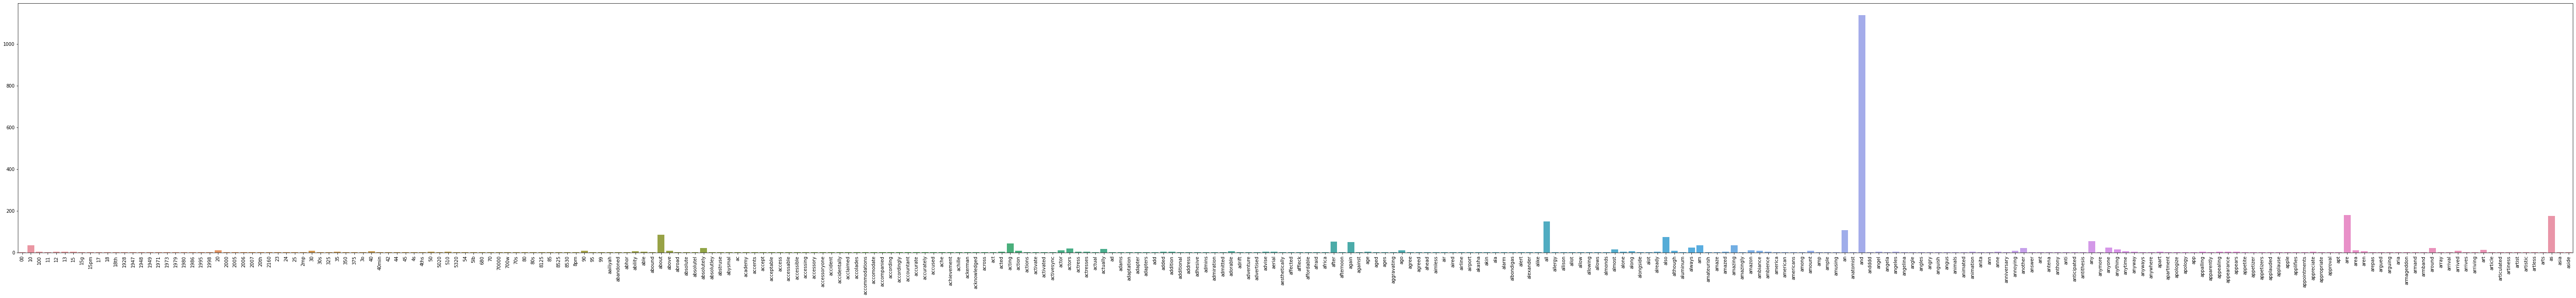

In [49]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### Exercise 13

In [50]:
# Answer here
import plotly.express as px
from IPython.display import HTML

fig = px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300], title='Term Frequency')
fig.show()

### Exercise 14

In [51]:
# Answer here

# concat x and y into a dataframe, then use sample() method to sample particular number of original data.
p = pd.DataFrame(term_frequencies, columns=['term_frequencie'])
q = pd.DataFrame(count_vect.get_feature_names_out(), columns=['feature_names'])
pq = pd.concat([p, q], axis=1)
pq_s = pq.sample(n=300)

fig = px.bar(x=pq_s['feature_names'], y=pq_s['term_frequencie'], title='Term Frequency')
fig.show()

### Exercise 15

In [52]:
# Answer here

In [53]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
term_frequencies_log

[0.0,
 3.5263605246161616,
 1.0986122886681098,
 0.6931471805599453,
 1.3862943611198906,
 1.0986122886681098,
 1.0986122886681098,
 0.0,
 0.0,
 0.6931471805599453,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.1972245773362196,
 0.0,
 0.6931471805599453,
 0.0,
 0.0,
 0.6931471805599453,
 0.0,
 0.0,
 0.0,
 0.6931471805599453,
 0.0,
 1.9459101490553132,
 0.0,
 0.0,
 1.0986122886681098,
 0.0,
 0.0,
 0.0,
 1.6094379124341003,
 0.0,
 0.0,
 0.0,
 0.6931471805599453,
 0.0,
 0.0,
 1.3862943611198906,
 0.0,
 1.0986122886681098,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6931471805599453,
 0.0,
 0.0,
 0.0,
 0.6931471805599453,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.9459101490553132,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.6094379124341003,
 1.3862943611198906,
 0.0,
 4.442651256490317,
 1.9459101490553132,
 0.0,
 0.0,
 0.0,
 3.044522437723423,
 0.0,
 0.0,
 0.6931471805599453,
 0.0,
 0.0,
 0.0,
 0.6931471805599453,
 0.0,
 0.6931471805599453,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.693

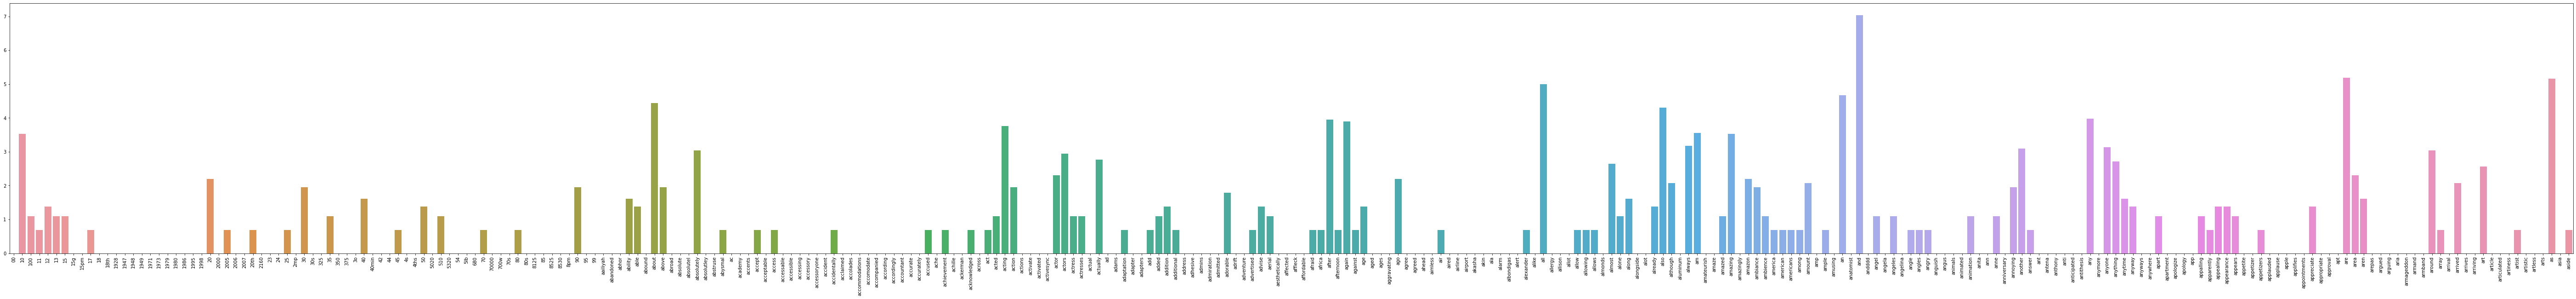

In [54]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### Exercise 16

In [55]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [56]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.score_2)

LabelBinarizer()

In [57]:
X['bin_category'] = mlb.transform(X['score_2']).tolist()

In [58]:
X[0:9]

sentence score   score_2  \
0  So there is no way for me to plug it in here i...     0  Negative   
1                        Good case, Excellent value.     1  Positive   
2                             Great for the jawbone.     1  Positive   
3  Tied to charger for conversations lasting more...     0  Negative   
4                                  The mic is great.     1  Positive   
5  I have to jiggle the plug to get it to line up...     0  Negative   
6  If you have several dozen or several hundred c...     0  Negative   
7        If you are Razr owner...you must have this!     1  Positive   
8                Needless to say, I wasted my money.     0  Negative   

                                            unigrams bin_category  
0  [So, there, is, no, way, for, me, to, plug, it...          [0]  
1               [Good, case, ,, Excellent, value, .]          [1]  
2                      [Great, for, the, jawbone, .]          [1]  
3  [Tied, to, charger, for, conversations, lastin...          [0]  
4                           [The, mic, is, great, .]          [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...          [0]  
6  [If, you, have, several, dozen, or, several, h...          [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...          [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]          [0]

In [59]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [60]:
print(type(document_to_transform_1))
print(document_to_transform_2)
print(document_to_transform_3)

<class 'list'>
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [61]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [62]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Third

### meaningful data visualization

利用word2vec model，尋找特定關鍵字的相似字詞，使用"food"當作範例

In [63]:
from gensim.models import Word2Vec

In [64]:
X['unigrams']

0       [So, there, is, no, way, for, me, to, plug, it...
1                    [Good, case, ,, Excellent, value, .]
2                           [Great, for, the, jawbone, .]
3       [Tied, to, charger, for, conversations, lastin...
4                                [The, mic, is, great, .]
                              ...                        
2743    [I, think, food, should, have, flavor, and, te...
2744                       [Appetite, instantly, gone, .]
2745    [Overall, I, was, not, impressed, and, would, ...
2746    [The, whole, experience, was, underwhelming, ,...
2747    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: unigrams, Length: 2714, dtype: object

In [65]:
#train_data_word2vec = word2vec.LineSentence(X['unigrams'][0][0])
model1 = Word2Vec(X['unigrams'])

In [66]:
# 把food跟最相近的15個字詞還有相似度print出來
query = 'food'
# print(model1.wv.most_similar(query, topn=15)[1])
print(query, 'most similar term:\n')
for item in model1.wv.most_similar(query, topn=15):
    if item[1] > 0.9:
        print(query, item[0], str(item[1]))
print('='*100)

food most similar term:

food and 0.9995701313018799
food from 0.9995490312576294
food are 0.9995436668395996
food with 0.9995316863059998
food just 0.9995308518409729
food were 0.9995226263999939
food , 0.9995204210281372
food great 0.9995145201683044
food some 0.9995140433311462
food our 0.9995128512382507
food by 0.9994994401931763
food at 0.9994985461235046
food we 0.999478280544281
food - 0.9994736909866333
food The 0.9994659423828125


In [67]:
# 把上面的內容畫成圖，不過因為相似度都很高，所以看起來不明顯
import plotly.express as px
from IPython.display import HTML
# from sklearn import preprocessing
termList = []
simlaList = []

for d in model1.wv.most_similar(query, topn=15):
    termList.append(d[0])
    simlaList.append(d[1])
# simlaList = np.array(simlaList)
# simlaList = preprocessing.normalize([simlaList])
# simlaList
fig = px.bar(x=termList, y=simlaList, title='similarity compare to "food"')
fig.show()

### TF-IDF

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
vectorizer = TfidfVectorizer(sublinear_tf=False, stop_words=None, token_pattern="(?u)\\b\\w+\\b", smooth_idf=True, norm='l2')
tfidf = vectorizer.fit_transform(X.sentence)
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names_out())
weight = tfidf.toarray()
word = vectorizer.get_feature_names_out()
#print(len(weight))
for i in range(len(weight)): # print term and tfidf
    print('第'+str(i)+'筆')
    for j in range(len(word)):
        if weight[i][j] != 0:
            print(word[j], weight[i][j])
    print('='*100)
#print("TFIDF")
#df_tfidf

第0筆
a 0.11570888319834846
by 0.2226826196056382
converter 0.39264942581299567
for 0.15440335644482323
go 0.22771947958024757
here 0.21812622552544686
i 0.10664188964822563
in 0.29682036683613405
is 0.12085923879304257
it 0.11926289835552685
me 0.2254955458484636
no 0.2206764810300175
plug 0.30316613687540994
so 0.18406733325907382
the 0.08683810038829416
there 0.20758296800603
to 0.12608585897067218
unless 0.32637630122780137
us 0.2700295745828128
way 0.24487919219244356
第1筆
case 0.511048226653959
excellent 0.47370582524379545
good 0.3357863658682137
value 0.6337823109404023
第2筆
for 0.3522398610520519
great 0.4050025452976369
jawbone 0.8201554940815293
the 0.19810346820878585
第3筆
45 0.35679135015122393
charger 0.2749151197802288
conversations 0.37531948139261606
for 0.1475886219524233
lasting 0.34364543182781454
major 0.35679135015122393
minutes 0.25007407146846694
more 0.2169492335686085
problems 0.27752703032936993
than 0.2169492335686085
tied 0.37531948139261606
to 0.120520943337258

great 0.2556982340709534
in 0.2137545865291713
is 0.17407307249033566
several 0.44216027836399335
situations 0.537613191482487
this 0.1796721225515644
第69筆
doesn 0.5057387014522187
mic 0.6662327314177501
t 0.3166742825352696
work 0.44730270759502455
第70筆
3 0.24069626845330924
bmw 0.32229346522643637
even 0.18113508664345618
fairly 0.2863382562669533
have 0.14773387372041852
hearing 0.32229346522643637
i 0.0875335143604438
in 0.12181765499761676
is 0.19840672271244064
my 0.13731534277039043
other 0.1992568068784977
person 0.2791839662099791
quiet 0.29509439963539397
saying 0.29509439963539397
series 0.255399223314437
the 0.07127822033580104
trouble 0.2863382562669533
what 0.18949013666919648
which 0.19224494876391154
第71筆
choice 0.8912273808980548
great 0.4535567831458299
第72筆
docking 0.5083701218264787
for 0.21028997953665263
home 0.4237745592747787
nice 0.32017969077388647
or 0.2962373433262094
station 0.4751105613334009
work 0.3189849889830258
第73筆
a 0.2872079537115012
beautiful 0.72

than 0.264867236406799
that 0.185599676978506
these 0.30015501095048563
ve 0.2675456207256637
wired 0.4355965556270084
第154筆
and 0.0785465707393634
any 0.18413323222956984
browsing 0.3040089518260189
fast 0.23198346895285854
faster 0.28900115703452434
have 0.13935256201172863
i 0.0825675194241683
is 0.18715061369508984
kind 0.22268137293433884
messages 0.28900115703452434
of 0.10185040609548317
phone 0.14371215694037223
phones 0.24090978736553215
previous 0.27009357169015963
sending 0.27009357169015963
significantly 0.3040089518260189
than 0.17572897855429148
this 0.09658515104710273
used 0.2076735781428443
very 0.13019505124056227
web 0.3040089518260189
with 0.12529482745540466
第155筆
build 0.46037495268599543
cheap 0.35472842939674454
nice 0.2899515602165097
out 0.26251260412859445
quality 0.2781195249094794
s 0.2139412643967219
some 0.29332176018063794
there 0.256026682140915
unlike 0.48428216775721417
第156筆
and 0.17157357921025837
fantastic 0.4820437261489137
is 0.2044016711411379
i

sync 0.5512727804983137
with 0.22720261195771088
第237筆
and 0.1702409943436576
new 0.44165712002376895
not 0.26538859846063284
phone 0.3114801864232098
the 0.14572317940237137
unusable 0.6263780057729319
was 0.4414989539272383
第238筆
customer 0.5998147494087687
ever 0.45549187897059873
service 0.4121871280571637
worst 0.512690146236025
第239筆
additional 0.3935654381094805
and 0.10696571543947811
ear 0.274248608631193
gels 0.3935654381094805
instructions 0.36781684877508436
no 0.4653554690204151
provided 0.35862677945537097
whatsoever 0.35085668655903585
第240筆
a 0.1660406558234706
bluetooth 0.40900591190376406
defeats 0.5634465251811325
headset 0.3468734974371814
it 0.1711406186888358
of 0.18876831441341685
purpose 0.5356312592979804
the 0.12461147960628265
第241筆
every 0.48124697741878003
penny 0.722271465114111
worth 0.49671448278382574
第242筆
case 0.38891443466792586
excellent 0.36049637512653093
phone 0.2791153523766715
type 0.5406124671714146
wallet 0.5904411117410792
第243筆
and 0.159521

第327筆
and 0.07584862985144412
buttons 0.23980740209548707
clear 0.22401523201625081
don 0.16499013059490858
have 0.26913207783318394
headset 0.18072793957453812
ipod 0.27907445965130334
mess 0.23263494659889788
on 0.25901410237095274
quality 0.16859313409591417
since 0.20952292940760195
sound 0.539926319587901
t 0.12397142375453273
the 0.19477512225323476
to 0.09426886925441189
very 0.12572307303909225
with 0.12099116359261912
you 0.2678888320237076
your 0.16402406053974797
第328筆
1 0.23833419494415475
2 0.21921533417447997
as 0.3335648630876905
battery 0.2112664734796858
don 0.1920525154351949
flip 0.31288041864783295
frequentyly 0.341718834556335
have 0.15663813449262964
it 0.10379329741149572
lasting 0.31288041864783295
long 0.23833419494415475
of 0.11448413561833543
phones 0.27079272263955223
recharge 0.32484944266966087
some 0.20697348924313608
t 0.14430574536968824
the 0.07557432281565753
to 0.10973125121036784
you 0.15591455034807122
第329筆
a 0.1732284200503099
adhesive 0.58783766

have 0.23951711912199242
i 0.14191582917479095
in 0.19749982213587144
is 0.16083585112123036
one 0.2615211209150075
phone 0.24701032629933645
several 0.40853662019794157
the 0.11556154022795441
this 0.16600912674154836
two 0.34613750849684877
used 0.3569462694940876
years 0.36184243321243076
第406筆
2000 0.528067077297089
an 0.28121579179488465
awesome 0.3768892639863073
fall 0.457433603132888
for 0.2076542681651869
look 0.3498080355038279
new 0.3539574338060196
第407筆
been 0.31259149870943953
cheaply 0.4867052818377211
first 0.3151891537351057
had 0.2503485037067133
has 0.27825561620321454
i 0.1390515118497629
is 0.1575896669743952
made 0.30653482560489487
phone 0.24202486441538684
so 0.2400073841175996
that 0.20737616476968498
the 0.1132291371147388
this 0.16265852927399635
ve 0.29893686039894474
第408筆
and 0.10071074131949181
att 0.3705511328268805
clear 0.2974442666584969
distorted 0.3705511328268805
have 0.17867488921369795
is 0.23996053381086277
not 0.15699792280793276
sound 0.238968

fine 0.3846148289671235
fits 0.42470228951955813
glasses 0.4973602261155997
i 0.14753139520368486
it 0.1649916542970681
them 0.3387727749355724
wear 0.43676032696394784
with 0.22387642059754184
第494筆
a 0.1041724884599627
almost 0.2667808945191449
are 0.16571547161956068
area 0.28423195462158196
device 0.2697503207974655
for 0.1390090494595443
hear 0.2667808945191449
in 0.1336134071310456
is 0.10880934385016867
nothing 0.2465521216400175
quality 0.20301321297349922
quiet 0.32366875032479275
really 0.18779268357773024
sound 0.21671933734884838
the 0.15636035472017715
unacceptable 0.33605047451352477
unless 0.29383596603362366
you 0.3225811822082316
第495筆
anyone 0.479749343707039
i 0.18681847128660226
item 0.4909323186151206
not 0.2770485741050345
recommend 0.4216997167582233
this 0.21853496863469637
to 0.22088100184139062
would 0.3778787788693107
第496筆
ad 0.42148109647972903
arrived 0.34429744703066983
did 0.2583952118719556
holster 0.38591136508451646
in 0.1593077252215207
match 0.38591

working 0.3289223610543118
第513筆
really 0.48782090505295517
ugly 0.8729437350673386
第514筆
3 0.44438816180970875
had 0.2909623353366774
horrible 0.43193809067602457
switch 0.565663078977698
times 0.4180966723930496
to 0.19107595478577374
第515筆
incrediable 0.5790908694706925
is 0.17824674397858917
noise 0.5302200972046741
shield 0.5790908694706925
the 0.12807137296309318
第516筆
improvement 0.7392981384140512
no 0.4370765298906758
real 0.5122522518801099
第517筆
battery 0.4560482437558105
buy 0.5308520615105362
good 0.31924769246277435
razr 0.6389812196101295
第518筆
amazon 0.5417487700568566
good 0.29160501023735247
keep 0.5417487700568566
the 0.14901215095270967
up 0.37980720448310573
work 0.4019016354525258
第519筆
or 0.3058273511949512
refund 0.505490263799182
refuse 0.5520816693212617
replace 0.4782360387128729
they 0.2932855676243263
to 0.17728204072679934
第520筆
accidentally 0.5092016041964235
activate 0.25460080209821173
buttons 0.20797707633037585
easy 0.18027031095556015
face 0.20471108

is 0.2366449252618814
joke 0.6515508595571079
that 0.3114069466305251
第565筆
description 0.5302918704326647
does 0.37734069132597836
everything 0.3793847522652751
it 0.35183244806807684
said 0.43708803957222847
the 0.12808870934075825
would 0.31817133946982623
第566筆
call 0.3010832635529419
due 0.3377923926222309
every 0.25982351225772937
forced 0.3570428655178892
happening 0.38995176629687245
headset 0.2400652536879501
i 0.10590921696487396
on 0.17202732001709745
stop 0.34644856578527394
this 0.24777921849105533
to 0.2504391967917385
using 0.29756480171548866
was 0.13064334295562743
第567筆
a 0.11200821976463542
adapters 0.38009150171754197
at 0.18872840525442042
cannot 0.30561154588931505
car 0.27127691251462216
charger 0.2784105432907615
especially 0.2810556631211825
great 0.1718538164409755
if 0.20241317288157806
in 0.14366364949789756
it 0.11544856850682916
plug 0.2934701152212066
same 0.27590847457419027
the 0.08406079778302064
time 0.19549329305581215
two 0.25178441763130555
with 0.

what 0.22395264218288102
第588筆
and 0.13065904427525118
breaking 0.4630288886312179
course 0.42035117896275753
is 0.1556587390814801
it 0.1536027577421141
killer 0.4492897348634945
of 0.16942403206424062
real 0.33310112028886985
the 0.2236835072876694
volume 0.39045801603167385
第589筆
are 0.2652282087907138
fine 0.40060134121615637
just 0.2922867189870963
now 0.3629526503244294
phones 0.4483488198520169
those 0.41070012896028996
working 0.42698378190865954
第590筆
am 0.43356558420550967
happy 0.4583444238112798
i 0.1797642370888881
more 0.38259337309066793
product 0.39779110602357903
than 0.38259337309066793
this 0.21028312480725028
with 0.2727892181548552
第591筆
construction 0.8015055804681362
poor 0.5979872945794384
第592筆
infuriating 0.9145185404246797
is 0.2814928722460211
this 0.29054707380078504
第593筆
i 0.14482993729714622
new 0.35743528551275994
over 0.34381916303148796
overall 0.3870903618355616
phone 0.2520824511099378
recommend 0.32692026176909306
the 0.1179344878051792
this 0.1694

is 0.14737708520397688
it 0.14543049011514655
loop 0.4788010288764592
needed 0.3979868517703875
no 0.2690953283510742
s 0.2115198624526581
sound 0.29353604309747083
the 0.10589133480967991
tiny 0.4383939403234234
第642筆
after 0.19438310331622247
and 0.08259014351839034
any 0.193612400047454
broke 0.25702120892921754
could 0.19138783783531924
finally 0.2611217604672594
four 0.29268255081257016
i 0.08681809040177596
it 0.09709296342331107
latch 0.3196593145422126
longer 0.27090272783425834
not 0.12874973222232422
of 0.10709365892936076
on 0.14101778720328945
or 0.1770762676678381
spring 0.29268255081257016
the 0.21208695967499275
three 0.2611217604672594
times 0.22460501616690598
use 0.19516937739666174
visor 0.3196593145422126
第643筆
address 0.28149676955938246
and 0.07273011465712356
book 0.23398448696604515
but 0.12689668055711933
car 0.2009083975406994
device 0.2148048493610838
download 0.267600317738998
fine 0.1993140232208717
handsfree 0.25774062826271377
high 0.22008803514566075
i 0

and 0.10882493255734511
arrived 0.3440671823724004
being 0.27743741086799467
expensive 0.3742100316624504
less 0.329314283283056
much 0.2582223982607212
others 0.3501073267048789
quickly 0.3440671823724004
sold 0.42119921172721364
than 0.24346949917137672
第720筆
2 0.47034474471274246
and 0.09471639146489715
both 0.24572323977963673
failed 0.325695803490208
have 0.16804007725476186
months 0.29050416221931435
pros 0.3356554895867838
they 0.19474739246172662
tried 0.27378026804042843
units 0.3665931003599615
we 0.19474739246172662
within 0.30471787881360607
第721筆
and 0.13214926660316256
classy 0.4862248038339674
good 0.22136173293734798
looks 0.38600001470612716
protection 0.46830993130326304
provides 0.4862248038339674
too 0.30396748459343964
第722筆
always 0.5363690704413491
good 0.33522071707000906
krussel 0.7745548987134172
第723筆
and 0.11193586596752247
easy 0.3067558451389566
etc 0.36715920497631277
friendly 0.2903958143641117
is 0.13335315477888005
it 0.1315917914311566
makes 0.3117832

they 0.19286475603613637
third 0.3225472797766848
this 0.11534253681831784
too 0.21575890876553608
ve 0.21197865233882843
第806筆
and 0.17279709969289486
awkward 0.6357828390645461
to 0.2147617858146575
unreliable 0.5941874405774067
use 0.4083381009684492
第807筆
also 0.36626076947417535
quick 0.5339209591650691
shipping 0.5661874532003083
the 0.14455283585384895
time 0.3361746574731323
very 0.27991706327515153
was 0.21897657626749376
第808筆
as 0.6036081214784748
good 0.2676223253499496
had 0.30236801188399853
hoped 0.6183632829041064
i 0.16794479920971703
not 0.24905924360138607
第809筆
case 0.835739497140335
good 0.5491261174990861
第810筆
doesn 0.6781667394005335
t 0.4246421423202809
work 0.5998074062034339
第811筆
good 0.4748440462791862
product 0.6593970341272138
really 0.5828539123120338
第812筆
did 0.4873772487374202
it 0.2414678327298929
not 0.32019744488316376
unfortunately 0.6138109255920733
work 0.47420085099456216
第813筆
all 0.25277433106747466
broke 0.4125084007536962
months 0.406554967

loops 0.40904480720285963
made 0.24490511512368976
material 0.37452460204459115
of 0.13703997686457023
problem 0.3024649565043673
that 0.16568258894110455
the 0.09046409263847882
weak 0.3400043968863226
第885筆
amazon 0.3569021150028732
as 0.4332902372432533
good 0.19210831782455726
it 0.1348242199234987
look 0.2940412179647349
looking 0.347048795456655
makes 0.3194419222384166
nearly 0.39436230776732983
not 0.1787831125985241
picture 0.3517512064974086
the 0.09816866188836561
第886筆
additional 0.2863518404777199
an 0.16041219532549036
and 0.07782652265209865
but 0.1357886953762347
case 0.1984103130969525
costs 0.2609310381392686
despite 0.2552776443549052
exceptional 0.26761758377818146
few 0.20314908428131892
flaws 0.2758012542455073
is 0.09271748810286203
oem 0.3012220565839586
of 0.20183345657236038
official 0.3012220565839586
owning 0.3012220565839586
product 0.18103452523658667
quality 0.1729895107585012
the 0.06661808083545775
these 0.19731547163076912
this 0.09569974061333072
well

第964筆
adapter 0.46320107618673145
charging 0.4012439827524463
current 0.44033455644494357
does 0.30178503411566665
enough 0.3001963156256638
not 0.18656429458200166
provide 0.46320107618673145
第965筆
assumed 0.42392787079629324
best 0.23896749580476137
hype 0.4030001235931549
i 0.11513698032961513
it 0.1287633783244918
mistake 0.3592675432222366
much 0.2598952430078997
my 0.1806173787837009
over 0.2733295404919103
phone 0.20040064061712454
so 0.19873013314639176
that 0.17171093709297894
the 0.09375562163469714
there 0.2241190228615859
this 0.13468398607344004
was 0.2840523315938792
第966筆
also 0.23358433961878589
because 0.2505239355572613
cannot 0.3351630899481076
case 0.27456935315093917
covered 0.39626689956952693
in 0.1575554108691177
is 0.12830674140281742
it 0.126612032402888
lense 0.4168449912713909
pictures 0.34648803103378656
take 0.29514744485280314
the 0.1843783528955034
with 0.1717992873015411
you 0.19019203159611067
第967筆
easily 0.559189438265637
falls 0.6611356429726711
out

第991筆
a 0.1238610848676105
appealing 0.3734229627753113
at 0.2086999067503003
best 0.23692997416420863
florida 0.42031331138572553
it 0.2553309921667615
look 0.27842859377736073
lot 0.2931504633728759
made 0.25165184375972377
movie 0.20514197344191168
of 0.14081520032499767
s 0.1856817518123362
showed 0.3734229627753113
the 0.09295622794577368
very 0.18000362418364632
第992筆
and 0.12069578561999414
best 0.2633286494014464
hilarious 0.38829777198064724
muppets 0.46714450969358373
so 0.21898935409845086
songs 0.3958924899467534
the 0.3099401590460896
were 0.49632780909573987
第993筆
cool 0.7414163911477544
it 0.3129235069540604
so 0.48295820605840495
was 0.345155015802841
第994筆
a 0.11881454047835883
almost 0.3042785082635346
case 0.265573862890485
delivers 0.36916228464509776
everything 0.2641084084345721
face 0.3241824168442361
in 0.1523935523161135
is 0.12410313299060995
movie 0.19678375442437415
on 0.17786659421627107
right 0.5282168168691442
that 0.16331040130744354
this 0.1280949029090

even 0.304929006483241
flick 0.46998784730222315
for 0.21335332999076298
it 0.16479652446930118
predictable 0.42994779677974754
too 0.3224414643481634
was 0.1817707706305535
第1022筆
correct 0.6327872753364973
politically 0.6656478412676732
too 0.39559223398330084
第1023筆
disappointing 0.8744869204001549
very 0.48504909653462236
第1024筆
and 0.11302737339052431
beautiful 0.32347964611077645
because 0.26291624221681975
house 0.35174211974166114
is 0.13465350616369973
it 0.13287496743477006
only 0.24371830788489796
really 0.2323967995841601
scenery 0.4005458586982271
the 0.29024809694281156
thing 0.288151079847011
was 0.14656125367878806
watching 0.3175555145307321
worth 0.3008493959467262
第1025筆
a 0.13431168897263876
but 0.20546077486050313
her 0.3134429028461868
i 0.24757394450578166
in 0.17227045879831118
lane 0.4332766499027758
lousy 0.41731264335203355
love 0.26891922351437875
movie 0.22245053772630427
never 0.277155322183219
seen 0.3134429028461868
this 0.14480250219566781
ve 0.26612072

any 0.25325172590003914
is 0.12870087421927542
level 0.36219761133099926
merit 0.4181254562620839
on 0.18445615044844405
this 0.13284053021183356
to 0.13426660996931525
torture 0.3714791857873785
utterly 0.36219761133099926
without 0.3155513408562938
第1099筆
again 0.3707785446744529
even 0.3384911079694882
i 0.1635757975408247
is 0.1853834964943146
it 0.182934902784332
ll 0.42006221855961645
say 0.3923957728363585
this 0.19134634567338515
torture 0.5350865777243593
第1100筆
a 0.13981666155669095
atrocity 0.4744573654316303
be 0.22903770403965726
explanation 0.4510351644242532
for 0.1865730723047122
maybe 0.39437633125080107
reasonable 0.39437633125080107
there 0.2508325789721801
this 0.1507374570070223
would 0.26064701013087793
第1101筆
a 0.15081637387959873
discovery 0.5117840650618928
not 0.2061321486180872
of 0.17146013150817277
pleasant 0.45468919660557555
self 0.41806370084799865
voyage 0.5117840650618928
第1102筆
highly 0.5749104778074943
unrecommended 0.8182163176734857
第1103筆
because 

give 0.32410649265650987
i 0.25055813320166975
if 0.2456440543487745
plus 0.38341517121768476
series 0.36553058038613206
television 0.46127046069296956
this 0.14654791200061007
would 0.25340267682837825
第1134筆
a 0.08957734519882245
actors 0.22065477624898502
actresses 0.27832096368763104
and 0.15707508542153187
best 0.17134968667794492
bonus 0.3039740094792667
characters 0.201361826312724
i 0.08255802923357734
on 0.1340982109201679
real 0.20022298193594226
show 0.22065477624898502
smack 0.3039740094792667
so 0.14249781516696974
the 0.20168010302781797
these 0.19911813804106246
think 0.18874429630982106
to 0.09761079876939953
were 0.4844456619404137
writers 0.3039740094792667
第1135筆
again 0.20866678544427406
and 0.17514823450887448
episodes 0.33894943271238376
find 0.24392667647022148
have 0.1553686875244513
i 0.2761716097620716
most 0.22326075265259945
must 0.24392667647022148
myself 0.27253137636977914
of 0.11355631852362882
over 0.43707856489476943
say 0.22083253121233296
taped 0.322

guess 0.27041157094450907
i 0.09134116328280129
it 0.20430267896051982
just 0.17374199202510754
light 0.266508917521615
on 0.14836457087578947
shed 0.31971048734064456
situation 0.31971048734064456
some 0.20369927240357477
stupid 0.24868400559373915
supposed 0.30793080727851263
the 0.07437877491574853
then 0.22408419718290778
to 0.10799535782685792
twist 0.31971048734064456
was 0.22534610797242946
第1153筆
if 0.23522108224182248
it 0.2683218373671079
just 0.22818482246631253
leave 0.37432742351953907
on 0.19485527287318274
probably 0.3178703483533142
see 0.2767052076189839
shelf 0.44169820131828336
should 0.3127447810217162
the 0.09768569677133235
you 0.40306339296459637
第1154筆
a 0.17938178511264413
acting 0.13016594181581015
and 0.15727419224747155
angelina 0.20290621595304684
appears 0.18578250706040855
as 0.0990322705388682
billy 0.18578250706040855
budget 0.1686587981677703
by 0.11507386674292788
cameo 0.20290621595304684
cool 0.1460224862939192
decent 0.16314619518655746
drago 0.185

this 0.11340249279793069
to 0.11461989985863123
tortured 0.35694278671411495
we 0.18962080001598483
were 0.18962080001598483
with 0.14711107881583332
第1203筆
admitted 0.3462386160191437
americans 0.3291460992794387
and 0.17891483643817732
be 0.16714188342455102
clichés 0.3170187656550043
elsewhere 0.2934279756417297
for 0.13615301826425522
full 0.2673321715376823
hatred 0.3462386160191437
is 0.21314757043734997
it 0.10516613078842485
made 0.2073015147076107
show 0.25133466008275085
stupid 0.25602341379296817
this 0.11000172470476137
to 0.11118262358132697
too 0.20576842454931157
with 0.14269944155244388
第1204筆
acting 0.200711856112753
all 0.15415328512155063
almost 0.23612090260348123
and 0.08083731326404926
bad 0.17004430939237672
be 0.15103611370544293
everyone 0.23366242052519182
garbage 0.2555799112548059
involved 0.27102539534841796
is 0.1926086988193275
must 0.22516215723867417
of 0.10482078474095755
pile 0.29742962480683705
predictable 0.2479357121046588
return 0.2415720789440231

going 0.17150001446085386
has 0.143062928507869
here 0.14623082817451405
i 0.07149223713833493
is 0.08102348325459002
it 0.07995330389553282
much 0.1613772767971989
of 0.17637718647709857
on 0.1161241515081123
problems 0.1946436334007827
real 0.1733857874030634
really 0.1398374148285167
sake 0.2502356785823169
simplifying 0.26323038681189387
the 0.17464760103411456
things 0.18943508147270063
this 0.16725919758418176
too 0.15643691801492907
with 0.10848827213315275
without 0.1986549736894032
yes 0.23386428236525963
第1219筆
amusing 0.5215604196016885
and 0.13475518450042528
are 0.24449860169995177
both 0.3495960941968425
do 0.317158075228555
good 0.2257268763578013
jobs 0.495812915451786
quite 0.36117372429693173
第1220筆
a 0.10123058345914303
and 0.08875459810080098
but 0.15485557717417578
convince 0.3435184004136545
convoluted 0.3435184004136545
didn 0.22263108497664277
film 0.16990472282179772
glance 0.314528115121905
just 0.1774643523074197
me 0.1972799757694293
much 0.21059902946577483

to 0.09562847512076182
ve 0.17388112245666654
we 0.15820244110379125
would 0.16359927337578864
第1261筆
a 0.16755775363251896
and 0.07345369637392951
but 0.1281591578460301
down 0.19975832416263833
each 0.21455380426513582
end 0.20459602212019487
family 0.20637148016891693
for 0.1117955633314114
great 0.12854163514308775
had 0.2780321028083289
i 0.07721393111172431
in 0.10745621365601583
it 0.1727043143774872
knew 0.26030485364814304
love 0.1677422916253024
loved 0.2029072070283315
movie 0.13875677046753007
of 0.19049307269501997
other 0.1757658363458911
portrayal 0.24093440051688506
s 0.12559399611863814
share 0.25258099775368936
special 0.2123198780146486
that 0.11515393603228452
the 0.06287502147019867
they 0.3020578722279491
this 0.09032267471975829
ups 0.25258099775368936
was 0.09524653634750999
who 0.174292684526095
第1262筆
12 0.27395800676409066
ago 0.2479349321937797
best 0.17382129631848534
but 0.13900581494377298
came 0.20545829470308752
god 0.27395800676409066
have 0.1413463855

hope 0.2796727408916642
human 0.2748477526894908
i 0.09138172551005402
in 0.25434618026261174
joy 0.2796727408916642
left 0.25674805093533054
lilt 0.33646236173873445
my 0.28670419674211695
race 0.3080675513151993
step 0.3080675513151993
the 0.14882360917785267
theater 0.2989264640908628
with 0.13867023752451432
第1281筆
a 0.2584328883464995
and 0.113291390592845
appearance 0.38956858382146675
duris 0.4384863219468676
fine 0.31047060714533736
gives 0.37983503762306764
has 0.23831267388286456
performance 0.32423525237333
wholesome 0.4168398779881322
第1282筆
also 0.33757452296095697
cast 0.4372979163329795
of 0.20182591048243537
play 0.4651320336944735
rest 0.5105362002188053
the 0.26646236055296235
well 0.32570395389430395
第1283筆
and 0.08900115624904467
barcelona 0.34447268630425626
cinematography 0.2769723335101607
famed 0.34447268630425626
fine 0.24390417376537232
gaudi 0.34447268630425626
including 0.30604315312026154
its 0.21989253144298607
noteworthy 0.32746734696711804
of 0.115406743

第1323筆
a 0.0941149570244973
adorable 0.27065928324750327
cruel 0.31937205523569595
highly 0.2244031766513684
if 0.17007775953382837
imaginative 0.29241953396071857
in 0.2414268921850333
it 0.0970057116021634
just 0.16499015732270328
mickey 0.283742760134254
occasionally 0.283742760134254
playing 0.2567902388592766
s 0.14108894743437855
seeing 0.2654670126857412
straw 0.31937205523569595
the 0.07063212313719695
turkey 0.303605840989945
way 0.1991791296600674
第1324筆
80 0.30198044990079836
a 0.09361110106440035
after 0.19316870388485013
among 0.30198044990079836
and 0.08207416542351173
best 0.17906573142305285
clever 0.26921027559418914
crowd 0.2908540301375958
even 0.17853225955716465
film 0.15711623538957006
films 0.23059107762057132
mickey 0.28222370848350736
pleaser 0.30198044990079836
ranks 0.2908540301375958
real 0.20923921953502464
s 0.14033361045802403
still 0.20179902553893855
this 0.1009228740335332
wonderful 0.2184600274234564
years 0.21997693153303974
第1325筆
a 0.14748646155144

a 0.07669923398751778
actually 0.19245689391855428
consider 0.22545935707879802
cool 0.1873068578840947
creature 0.2602731039575474
credit 0.4948487716358129
critic 0.2602731039575474
due 0.22545935707879802
effects 0.20927188662320315
fair 0.24742438581790646
give 0.18287796432872594
i 0.14137810375335216
like 0.13357476949134736
ll 0.18152929960058112
myself 0.20927188662320315
okay 0.2602731039575474
pretty 0.16305007141361302
s 0.11498081213069329
so 0.12201157830635448
the 0.05756183619278419
to 0.08357775593712398
were 0.1382664001965167
where 0.1873068578840947
第1349筆
close 0.3293072932665443
drooling 0.3961755774874446
gotta 0.3961755774874446
love 0.2337531505264833
of 0.13272847134876817
slimy 0.3961755774874446
teeth 0.37661785810904913
those 0.28758390743853074
ups 0.35197804570318386
第1350筆
a 0.09493969977526556
avoided 0.3062663821447603
be 0.15552345919748925
breeders 0.32217075796777106
cheaply 0.3062663821447603
ebola 0.32217075796777106
film 0.15934614643025924
horror

i 0.14850833786699857
pitch 0.5467993279589225
that 0.22147971736152872
was 0.1831910977319685
well 0.29563134241246325
第1389筆
about 0.16711329539213085
and 0.23047404907946523
are 0.13939001787318359
be 0.1435389313728422
by 0.16863249864759536
characters 0.19697023800554006
does 0.19372606592234848
doesn 0.20053400145859984
find 0.21398548097360404
goes 0.2519915247785439
i 0.08075748499693909
interesting 0.22440025238330305
it 0.09031508871803064
longer 0.2519915247785439
make 0.1898084782261564
more 0.17187667073078688
movie 0.14512468990914767
on 0.1311736042761226
out 0.16118016743181368
people 0.1958562311848153
surprised 0.2722509398297995
t 0.12556674198252663
the 0.19728157328428508
them 0.1854414597751163
think 0.18462788924349574
to 0.0954819620858027
want 0.2044872740912106
who 0.1822914421404859
will 0.1676126462754317
you 0.13566807104403936
第1390筆
go 0.5961185332141643
it 0.31220352411491026
watch 0.7397105203313143
第1391筆
omit 0.7837733271710077
this 0.2490086714118367

he 0.25783847287422806
how 0.25268332884059946
i 0.22750040121194823
it 0.1272124739869217
realised 0.41882182603271184
t 0.17686586067523483
that 0.16964274627186973
this 0.13306177034004935
until 0.35494030671771304
was 0.1403155163914244
wasn 0.2921102164653765
watched 0.3274555260862849
第1409筆
10 0.710675827252029
film 0.258956194583796
give 0.3678772620352662
i 0.14219807703850146
ll 0.3651642884443002
of 0.1754071333785145
out 0.28380663249253385
this 0.1663392923168172
第1410筆
and 0.07585377298616627
as 0.2865812093038047
be 0.14172488692570856
but 0.13234671834433864
connor 0.29358666839947256
could 0.17577750788435068
dull 0.2790933830985206
energetic 0.29358666839947256
george 0.29358666839947256
him 0.23982366292681334
i 0.07973687222086479
jim 0.29358666839947256
know 0.19561578104899094
much 0.17998764361549915
nobody 0.2688102335287172
o 0.2790933830985206
that 0.2378331099306429
very 0.12573159805402775
was 0.19671737441349285
well 0.15872993336937496
第1411筆
be 0.14267003

and 0.27420839651592577
go 0.6155099928546726
it 0.3223593600773592
see 0.6648621262688388
第1455筆
an 0.508522132401006
excellent 0.5830201424571974
film 0.47229646240574186
is 0.2939233807333855
this 0.3033774088570241
第1456筆
aerial 0.570243666678084
done 0.4700179283220821
scenes 0.460527091937587
the 0.13773881770984459
well 0.3367235615546258
were 0.3308555069070543
第1457筆
also 0.31323721973705937
and 0.1444258999163551
balance 0.5118158050119784
it 0.16978707168410492
love 0.32981773032479395
of 0.18727535039049875
right 0.36616648909117633
the 0.12362593043468105
war 0.5118158050119784
was 0.18727535039049875
第1458筆
been 0.17778718683811925
by 0.16514198487002818
conflict 0.26661563427450774
few 0.19638316042513632
film 0.14402291325788447
gives 0.2522406739074506
has 0.1582585688699762
history 0.24677556761652739
human 0.23786571354039338
in 0.11006136135810028
many 0.19762725349609955
meaning 0.26661563427450774
much 0.17851820272680882
never 0.177070939962151
of 0.0975556749897

overly 0.2323827436361493
rare 0.21509010010288002
syrupy 0.25380163025072233
t 0.10717885502835688
takes 0.22548740227371136
tale 0.22548740227371136
tell 0.1959612181183687
that 0.10280172352012848
the 0.11226121826507705
time 0.13053834736225947
to 0.0814996647252454
trap 0.2412723847739988
when 0.14622810352678464
with 0.10460228647597025
worthy 0.25380163025072233
第1532筆
a 0.14683652584153065
film 0.24644942635631628
for 0.19594046551953026
lovely 0.42227792579746387
nine 0.4982787489290626
of 0.16693552154417463
out 0.270099666417787
ten 0.44269053982520423
truly 0.3948575419646248
第1533筆
a 0.09684245526439678
addition 0.29196576637383553
early 0.3008939974190876
film 0.16253971830282454
from 0.17457876668989264
fulci 0.3124044891868275
future 0.3124044891868275
genre 0.3124044891868275
giallo 0.3008939974190876
good 0.1422272137466222
goremeister 0.3286276161589368
is 0.10115304117178905
lucio 0.3286276161589368
sub 0.28467087044697836
the 0.07267907717753001
this 0.104406622746

doctor 0.24626635337782565
gently 0.25905493503427407
good 0.11211675405702225
in 0.19583062088623882
memorable 0.21954213553956675
menacing 0.25905493503427407
performance 0.1915561285160733
playing 0.20829242118892322
quinn 0.24626635337782565
role 0.23015464593099189
scrimm 0.25905493503427407
somewhat 0.23015464593099189
the 0.057292426718849314
turns 0.23015464593099189
violin 0.25905493503427407
第1597筆
conclusion 0.7340883540110692
i 0.22441057759936675
it 0.2509694454442149
loved 0.589719016668329
第1598筆
a 0.29995436642168577
by 0.288632221790746
entertained 0.508936334402616
i 0.1382249122075245
it 0.15458375418127174
long 0.3549612115912793
movie 0.24839613965933283
s 0.22483273209042615
since 0.36323537053414495
so 0.23858064653519542
time 0.26176233753854955
was 0.17050607235183618
第1599筆
about 0.296475352353269
anything 0.3939629385016771
bad 0.2867005984665238
find 0.3796312000267117
i 0.1432716874109274
it 0.16022781244104253
say 0.3436890136094187
struggle 0.501476654752

for 0.10038954366148098
force 0.25529170857367556
from 0.13562010445096842
he 0.15716474210431394
how 0.15402243803493232
just 0.13188573787292543
know 0.17009998185619468
make 0.16296427056944565
money 0.17009998185619468
movie 0.12460001499238696
obliged 0.25529170857367556
of 0.17105788520279508
one 0.12777194480688692
only 0.1422270118655111
screenwriter 0.2337470709203301
script 0.1853162871722021
sum 0.24268890345484342
surely 0.25529170857367556
t 0.10780810586649742
the 0.11292030783703869
to 0.1639563042627887
was 0.08552894260139754
who 0.15651035284146145
write 0.24268890345484342
第1616筆
ever 0.3491954077324703
films 0.4469552565641121
have 0.28223817445394994
i 0.16722839978720272
of 0.2062830583722114
one 0.30816688184450153
seen 0.4234416119374741
the 0.13617347382344067
this 0.19561905656674575
was 0.2062830583722114
worst 0.39304552489478
第1617筆
bad 0.30206166326160405
get 0.33662806856881144
how 0.3353140909709802
i 0.15094800788389184
it 0.16881262119988508
m 0.335314

long 0.3085294976337896
on 0.19514875421440053
screen 0.31834910889590834
see 0.27712196726965455
so 0.2073724244140962
t 0.1868073489622913
that 0.17917822908696582
time 0.227521768190289
was 0.14820253911798129
第1650筆
a 0.08118165682471115
about 0.15482719958115942
and 0.07117656619595049
built 0.26188425275281246
characters 0.1824890729350566
has 0.2994451338128236
in 0.2082499501595729
loneliness 0.26188425275281246
most 0.18145696740471917
movies 0.1921381549417151
of 0.09229380867046051
one 0.13787799859069896
paolo 0.27548387001651975
recent 0.23863555348244667
seen 0.18945345984134035
sorrentino 0.27548387001651975
story 0.19661690242471402
the 0.060925839660449975
tony 0.27548387001651975
unforgettable 0.27548387001651975
wonderful 0.18945345984134035
written 0.22898647147578816
years 0.19076895327598622
第1651筆
a 0.09435803051583574
after 0.19471001033661314
but 0.14434241883477467
completely 0.24433619065600318
di 0.3201969069166234
for 0.12591251610469303
girolamo 0.32019690

found 0.1840737641465608
had 0.25620166735001476
however 0.18549159954610658
i 0.21345381731451263
it 0.15914397242305736
mind 0.2140008543445309
myself 0.21064027064268054
not 0.10551611111576287
only 0.14595036378115792
over 0.33781925746645086
realized 0.2398663206526595
that 0.10611231622316254
the 0.05793822070409603
this 0.0832307479207465
to 0.08412425297240927
watching 0.3803353409819489
第1667筆
alert 0.276156486819338
as 0.1347834702120934
attempt 0.24534834064073044
because 0.16597011204724957
ceases 0.2625236649579063
decipher 0.276156486819338
i 0.07500291012027455
interest 0.2528510239142375
it 0.2516383892544383
keeps 0.2528510239142375
me 0.3171890935838451
meanings 0.276156486819338
movie 0.1347834702120934
never 0.16792926865192187
one 0.13821463920267196
s 0.24399522383861605
simply 0.21072978082187324
that 0.11185650296354151
the 0.061074595170088244
to 0.2660344742298633
try 0.20624009810403657
第1668筆
brilliance 0.7176741500368944
indeed 0.6963790737585537
第1669筆
and

genre 0.5146017486056725
heaven 0.5146017486056725
in 0.20460525475029634
of 0.18135704926147495
the 0.1197190869438395
will 0.30514405331844335
第1714筆
a 0.1704043778451506
actress 0.5294543006737487
become 0.49005522849891076
great 0.2614508357732621
had 0.28275556620280046
lange 0.5497082087662105
第1715筆
a 0.2013017976202107
it 0.2074848115784657
like 0.3505750946572616
looked 0.5789111739820316
story 0.48754038102564096
wonderful 0.4697775768949503
第1716筆
a 0.17621690009790592
faster 0.5684588490747559
i 0.16240847456957833
movie 0.29185504614737684
never 0.3636277087596786
of 0.20033748383892572
out 0.3241436397438858
walked 0.5067710955250352
第1717筆
bored 0.35197204211358124
clothes 0.39616882003308956
got 0.2528925171121193
her 0.27244990290004756
i 0.10759774193113869
jessice 0.39616882003308956
just 0.2046639800572743
lange 0.3766114342451613
off 0.25951033751224073
take 0.2805076645073304
watching 0.2875790022014637
第1718筆
a 0.11722150592681094
any 0.24093026923912902
film 0.1

slow 0.48632604315931266
waitress 0.5433563389810563
was 0.2264016214318276
第1740筆
alone 0.4804298588787485
is 0.1615085103463617
let 0.41580393584663605
not 0.2113389250931433
place 0.2698759762459382
this 0.16670342201079483
time 0.2698759762459382
vegas 0.36868257407537686
worth 0.36085014911447927
your 0.2931711290288886
第1741筆
all 0.433670218401744
at 0.4370457876949095
did 0.5396152177988924
like 0.451723797203237
not 0.3545167822398009
第1742筆
blah 0.6803067769121789
burrittos 0.7156350247570183
the 0.15826939258234496
第1743筆
amazing 0.7704598846106895
food 0.5832892973083941
the 0.25722589654069195
第1744筆
also 0.46983101028868834
cute 0.7262924269279037
is 0.2580758883002061
service 0.43029637255773545
第1745筆
beautiful 0.38906555963910794
care 0.4113785332749407
could 0.31502540583640376
i 0.14290304165667225
interior 0.5261609433076712
is 0.16195467740498004
just 0.2718189503127567
less 0.4113785332749407
the 0.11636542373835518
第1746筆
performed 0.8018091395976024
so 0.39539351

was 0.11731475274590356
which 0.20887173502936698
第1796筆
because 0.18993578134042363
but 0.14246526688639374
common 0.31603279318944455
didn 0.20481791819955247
excalibur 0.31603279318944455
guess 0.254105314225411
have 0.14486408754132837
i 0.25749942855574504
inside 0.2504379971395571
is 0.0972762986713405
it 0.09599144787522695
known 0.28077602771580346
my 0.13464794048183168
of 0.10587868591532681
place 0.16254583744980264
sense 0.28936207969905214
should 0.22376728364916473
suck 0.28936207969905214
t 0.13345868933937538
that 0.12800830237639008
the 0.06989361404045043
this 0.10040518505359304
use 0.1929551890957544
would 0.17361518368083764
第1797筆
appalling 0.4372467540782663
as 0.23307651256983536
dish 0.39009719529411774
for 0.1877884584245423
is 0.14699142986195135
quite 0.33069577629512753
scallop 0.4539733262480626
the 0.10561423909370042
value 0.39009719529411774
well 0.25819012628254046
第1798筆
2 0.43199910103408806
bad 0.3659922747772426
customer 0.5029197455860615
service 

side 0.38680266015791287
the 0.11079472324791997
their 0.3022463137574414
up 0.2823973336350706
第1822筆
added 0.2173203519850979
and 0.18397255671804963
another 0.17081079710489222
bone 0.23735092699843044
extra 0.2011485686564398
fantastic 0.17229307130253202
found 0.16677195492350566
garlic 0.22563379174774872
go 0.13765314812841123
he 0.2922397867000267
loves 0.21087194713155732
marrow 0.4747018539968609
meal 0.18808709747115415
our 0.29348275982034616
out 0.1286597237871675
roasted 0.22563379174774872
server 0.1811179936431072
the 0.05249238193400717
to 0.1524341743076193
was 0.07951834364326288
when 0.136750011775017
wife 0.19388608148373446
第1823筆
and 0.09622482249823539
bloddy 0.3724313760864559
coming 0.2781404283700256
good 0.16118510535334546
he 0.22927920965866508
helpful 0.2994524425543443
kept 0.29513066336476756
mary 0.35404581989593226
only 0.20748735648988081
our 0.23025439478958756
s 0.1645289560628479
the 0.16473337841960387
thing 0.2453147912687672
very 0.159497678610

my 0.15663694044368423
of 0.12316945480656927
right 0.24082468267048515
seated 0.3184678522136256
the 0.16261551154323242
we 0.19530528284308302
were 0.19530528284308302
第1873筆
a 0.1687024609008317
at 0.28425544549510606
bay 0.5086131196445577
great 0.25883959060963607
is 0.1762116308048384
mandalay 0.5724791612792647
restaurant 0.3964342825698319
the 0.12660913173231453
this 0.18187946746752395
第1874筆
five 0.4186329337516496
for 0.18529226297334747
forty 0.47120025327995246
in 0.17810013569005673
minutes 0.3139590979329559
vain 0.47120025327995246
waited 0.3916689690420122
we 0.2503184608861183
第1875筆
came 0.36484837392847214
crostini 0.5475765707563176
salad 0.40894294018932575
stale 0.5013653605673203
that 0.22179453763706003
the 0.12110169045366569
was 0.18345149300675895
with 0.22567924904658374
第1876筆
great 0.25624372829150627
here 0.31483654702176966
highlights 0.538760109410615
nigiri 0.5667378560980159
quality 0.32547319265576874
some 0.34326381721123106
第1877筆
always 0.362596

we 0.1842160919157652
were 0.1842160919157652
第1897筆
an 0.18199547584927445
back 0.1932265540203559
but 0.15405891166694224
by 0.19381676212274465
caught 0.32488015865821673
go 0.1982007050333916
i 0.18563627278028305
inspired 0.3417511456224255
judging 0.32488015865821673
m 0.2061850929044425
night 0.2503268862708919
not 0.1376476970445025
off 0.22386404648973385
on 0.15076360405415143
other 0.21128644968321045
perhaps 0.27916802898244997
reviews 0.28962496438492524
the 0.0755814687107394
them 0.21313604189687282
to 0.10974162679798989
第1898筆
a 0.1605580362133187
be 0.2630147478131861
desired 0.544841666311421
here 0.30267268552713067
leaves 0.4988612608187885
lot 0.3800036368523807
service 0.2796182121019319
the 0.12049684070443559
to 0.17495716276077172
第1899筆
a 0.12086512989116253
and 0.10596931936306406
atmosphere 0.3166758981610444
coziness 0.41014676264073974
hip 0.37553356100110524
is 0.12624499685324608
maintaining 0.41014676264073974
modern 0.37553356100110524
of 0.1374091587

unbelievable 0.6156070709313882
第1949筆
always 0.2869084867580498
and 0.10704656365321114
at 0.20572211664204457
feel 0.3034795222479925
folks 0.36809485687405513
make 0.26447678722409856
otto 0.4143161605460267
so 0.19422432782103757
special 0.30942096121392554
the 0.09162990183289776
us 0.28493003992908195
welcome 0.4143161605460267
第1950筆
also 0.3375578605007173
as 0.29400889853445017
for 0.2368813451434296
mains 0.6023918540243374
the 0.13322460407154557
uninspired 0.6023918540243374
第1951筆
amazing 0.37340501375498153
and 0.1456398799773047
first 0.3470226882111591
had 0.275633249800717
i 0.1530954630579854
is 0.17350593832209302
it 0.1712142265071034
pho 0.47771125084097427
place 0.2899233259518279
the 0.12466507517707812
this 0.1790867465464081
was 0.18884950392814737
where 0.4056615470204568
第1952筆
a 0.12069341732694096
again 0.25213913772028995
are 0.19199662856664412
experience 0.2745261976108632
in 0.15480343174810177
made 0.24521600979396002
must 0.29474485717135235
place 0.2

was 0.16974634744094674
第1975筆
again 0.18866851940824617
because 0.1841855965607071
complaints 0.28060182707698084
don 0.17223924385789938
felt 0.22887527781638467
i 0.24970379739863763
made 0.18348814040265302
most 0.20186382588514865
my 0.13057155986247324
of 0.1026732761502468
overall 0.22246306044778627
parents 0.28060182707698084
place 0.1576248657723549
silently 0.306465101707279
similar 0.29133605590270173
t 0.12941831254073125
take 0.21699287168972584
that 0.24826586514166077
the 0.06777762940175591
they 0.16280524477794805
think 0.1902910714779497
this 0.09736548204015713
to 0.09841072736395624
too 0.1821311611127878
would 0.16835909459807583
第1976筆
good 0.1946215893546537
itself 0.37378857144724903
now 0.28847911861686093
peanut 0.4496891085599455
pizza 0.3393718297926792
sauce 0.36157131379044005
tasty 0.35158908744948814
the 0.1989059215955619
very 0.19258412023600827
was 0.30131361625007475
第1977筆
7 0.43241920793107974
and 0.12897539335005637
at 0.2478649478246745
fast 0.3

food 0.5684113852596027
第2033筆
a 0.12223417382673839
came 0.2763748142545389
english 0.39431574231839
muffin 0.4147925106624811
ordered 0.3038284405850755
out 0.22484466576856238
she 0.2872383529426052
that 0.16801068203234268
toasted 0.39431574231839
untoasted 0.4147925106624811
第2034筆
food 0.5666173104380315
good 0.48898306462484714
the 0.2498736842000354
very 0.48386396197535525
was 0.378522382783207
第2035筆
back 0.5357060581756264
going 0.6173022601637987
never 0.5761570435485434
第2036筆
and 0.13359752068957875
food 0.2593177277954222
for 0.20333367580494363
great 0.23379141701840894
high 0.4042784198473863
house 0.41575658807198684
is 0.15915944992788217
made 0.30958828179350933
price 0.3405924485086978
quality 0.2969549320088473
the 0.11435703574345811
very 0.22144488152778083
which 0.3084331002334479
第2037筆
boy 0.4400983727839113
bus 0.48066256011735636
hand 0.40734867648098766
on 0.21204440958114718
other 0.2971679455174145
rude 0.3926413158593244
so 0.22532638486632614
the 0.212

spaghetti 0.5866079063504487
special 0.4380924509423771
the 0.1297338361179423
whatsoever 0.49713452657264706
第2062筆
all 0.48665849099032205
best 0.27839369909968853
but 0.2226329215015081
dishes 0.4034300464003408
great 0.22329734564007991
of 0.16545844250491523
salmon 0.43877352497296856
the 0.32767185633813806
was 0.16545844250491523
were 0.26236137817567845
第2063筆
and 0.11463165071697687
are 0.20798664195936492
authentic 0.368788473791518
feels 0.368788473791518
fresh 0.3280710211578757
like 0.2276977983781615
sauce 0.3567346440349596
so 0.20798664195936492
thai 0.3843285631417356
the 0.19624519543041924
vegetables 0.3941772591654466
第2064筆
driving 0.5119466799968659
from 0.2970315817910974
it 0.16983048746029464
s 0.2470081845933907
tucson 0.5591331780990177
up 0.31518252183019296
worth 0.384522386361826
第2065筆
i 0.12597457725646502
in 0.1753148802812545
none 0.36755989318766547
probably 0.33379853899230316
seen 0.31898217123705036
selection 0.3729422979814979
the 0.20516127428452

with 0.1519988921496575
第2117筆
and 0.14284212817706757
atmosphere 0.42686562023417673
family 0.4013214157707417
is 0.3403457553679516
nice 0.3310110008165452
perfect 0.40496078843314265
see 0.346343592199429
service 0.283733488073661
the 0.12227025077487645
to 0.17753209163460645
第2118筆
and 0.14691612809218044
cooked 0.4726528346716918
impeccable 0.5405574120678238
perfection 0.5405574120678238
service 0.2918258500475311
the 0.1257575202354672
to 0.18259548389485505
was 0.19050439971233143
第2119筆
a 0.22426752654780208
disappointment 0.5950146736886002
is 0.23424997109429102
one 0.3808934052191588
simply 0.5807314207913411
this 0.2417846075330839
第2120筆
at 0.26635232918981605
bouchon 0.5364229971171817
disappointed 0.34765076255249605
food 0.26901844267640257
i 0.14569017118742875
of 0.17971477407878478
overall 0.38938952908003466
quality 0.308063602258308
the 0.11863497311323386
very 0.22972882599936048
was 0.17971477407878478
with 0.22108239399928087
第2121筆
accountant 0.43304446375371

nice 0.2293988437157387
taste 0.2923714210408377
texture 0.3508114177555443
told 0.31298242666678533
very 0.16408631319942518
was 0.12836323251021842
what 0.2252679263915097
with 0.15791050507847765
第2140筆
a 0.08401853728609639
and 0.07366382031033464
been 0.17407551717628716
bird 0.28511061131306803
everywhere 0.2610494898368444
green 0.25330353883915036
ground 0.27103575752418074
in 0.10776360625460815
large 0.2416236249827894
next 0.21082279283641717
of 0.09551900156211826
on 0.12577661806328075
our 0.17626863758315664
pile 0.27103575752418074
poop 0.28511061131306803
right 0.1867616713601936
smeared 0.28511061131306803
stepped 0.27103575752418074
table 0.22924241736292678
the 0.06305488371900397
to 0.09155346720456563
tracked 0.28511061131306803
was 0.09551900156211826
第2141筆
can 0.24529364975890355
even 0.24382630580888312
find 0.312215070620813
furthermore 0.43383988419200437
hours 0.3437934101072011
of 0.14534693179252384
on 0.1913885742916739
operation 0.43383988419200437
t 0.1

the 0.07492195443880299
to 0.10878403533630786
total 0.29345581718911606
would 0.18610554140313995
第2194筆
burger 0.3792322937050957
cheese 0.4381741047641342
cold 0.3792322937050957
friend 0.41454932594351185
my 0.20389416899519983
on 0.21111727532807448
s 0.2114137944097724
the 0.10583823489503558
third 0.4251724507632674
was 0.160329572080772
第2195筆
and 0.15674625314396765
brunch 0.5554766131417836
enjoy 0.46841633782396247
pizza 0.4578463246443311
their 0.36601897037950537
we 0.32228765903995227
第2196筆
all 0.23868880022305003
also 0.2714684768179509
and 0.12516737026419253
are 0.22710255728942738
cooked 0.4026835796179727
perfectly 0.3740468433421395
steaks 0.43040583154037304
the 0.10714098107011849
trimmed 0.48445146208995116
well 0.26192248005486196
第2197筆
40 0.2713811245483091
70 0.2978200103731801
a 0.092321403916058
and 0.08094341473373552
beautifully 0.28684688131670677
claimed 0.31328576714157785
group 0.2978200103731801
had 0.15319084619201467
handled 0.28684688131670677
ha

good 0.2506493647329221
place 0.29787336068631254
say 0.3773254525010792
things 0.4167852583626523
this 0.18399751338745335
第2222筆
ambiance 0.683246169814856
incredible 0.6513758133405511
the 0.18178954556779547
was 0.2753847896135858
第2223筆
and 0.16539432145170524
are 0.3000899777917386
friendly 0.429083370678556
manager 0.5687319331405799
so 0.3000899777917386
the 0.14157451599693527
waitress 0.5147084947258778
第2224筆
i 0.15335225890960974
impressed 0.4063419865341928
noca 0.5646343721647095
overall 0.40986817019626814
t 0.23844159495148265
very 0.24181064595175983
wasn 0.39380819820011737
with 0.2327094837531464
第2225筆
basically 0.46494654194075064
gyro 0.548626786019234
lettuce 0.548626786019234
my 0.23374620742719718
only 0.30564858075825824
was 0.18380334070852306
第2226筆
service 0.6055720154804104
terrible 0.7957905089073339
第2227筆
disappointed 0.5893325704358655
thoroughly 0.8078905380207492
第2228筆
and 0.09151246137760587
but 0.15966738995498572
don 0.1990629624203455
each 0.267

great 0.17029341787289634
hankering 0.37664034626867354
huge 0.29447596822018574
i 0.10229389272807132
is 0.11593157294074222
place 0.1937182527286854
stop 0.334622173969872
sushi 0.28740710939662106
that 0.1525572420688871
this 0.11966050511437432
those 0.27340328034829225
with 0.15522926846405588
第2282筆
and 0.16532986420063595
generous 0.5858951724543637
great 0.2893220100748688
portions 0.5543058025878912
taste 0.48829369707349485
第2283筆
and 0.09838509863083249
anyone 0.26558644698656886
back 0.21530062873830158
ever 0.21595826182695743
go 0.22084302349856327
i 0.10342161937540768
never 0.4631158144839747
place 0.3917077523490756
recommended 0.3110600013972301
this 0.2419593757587404
to 0.24455687644134233
will 0.4293043872344359
第2284筆
an 0.20046934368777822
and 0.09726088397400671
are 0.17646927812021093
as 0.1837294352669261
back 0.21284045818585218
being 0.24795611809142895
even 0.21156724887551923
forth 0.3578578636610302
helped 0.3578578636610302
much 0.23078294768059224
not 0

it 0.17414769629579144
pretty 0.359177433582987
tasteless 0.49665671747796564
was 0.19208512473889208
第2312筆
a 0.1250958220881139
and 0.21935721467022834
char 0.40354714564130906
color 0.352853735889765
flavor 0.3277606357732816
has 0.23071304928823574
instead 0.359755203785654
it 0.12893815843698977
nice 0.25416049204445795
no 0.23857896685979021
of 0.1422189484775329
pale 0.42450329963260475
was 0.1422189484775329
第2313筆
also 0.25245607155456073
an 0.23992046683481993
croutons 0.45052270676756895
extra 0.38180595609858603
homemade 0.4125020889960736
is 0.13867289194723526
plus 0.37448147122457826
taste 0.3437853383270907
the 0.09963731885379294
which 0.26873245667162143
第2314筆
damn 0.4120883063570893
driest 0.45223537148431076
ever 0.26979423976050465
got 0.30367357712074317
home 0.376980937728366
i 0.12920347171781785
see 0.2980183597203952
the 0.10520991408308819
to 0.1527610844788239
wings 0.4226483657787986
第2315筆
a 0.13457848384874635
be 0.22045689412600553
it 0.1387120815312046

anytime 0.4778762922621509
back 0.31191290413719563
be 0.26630928043645047
going 0.3594219959988228
soon 0.43131993448096473
t 0.23296528951617182
we 0.2930649476093964
won 0.3847635766997785
第2368筆
35 0.4146400118565748
bay 0.4023366696223813
big 0.3232112100442659
disappointed 0.2934928589089056
ordered 0.33171053058648386
plater 0.45285768353415307
the 0.10015372084888344
very 0.3878821920096187
第2369筆
an 0.2618087344312398
and 0.25404132596510093
awesome 0.3508796593362985
beer 0.40159585297653033
burger 0.38958442898411333
great 0.22228212496779284
have 0.2253523565501264
place 0.25285830421067323
relax 0.49162450059986074
to 0.15786830025490278
第2370筆
a 0.23305959643023502
down 0.27784804584470885
family 0.28704642333867847
few 0.26668792908507816
for 0.15549879553680565
friends 0.3286918296417794
get 0.23950857341722812
is 0.12171669382413478
it 0.12010902789629534
meal 0.31335983622026686
or 0.2190525206276882
perfect 0.2896494962495334
sit 0.37591397272040894
together 0.313359

stars 0.522804118903129
then 0.23993835754201762
第2399筆
me 0.25949549579940995
more 0.26118837025831476
spends 0.45185263878856863
staff 0.3279998940705671
talking 0.42954634932504315
than 0.26118837025831476
themselves 0.4014437481363104
time 0.23240235557378913
to 0.14509693468125762
your 0.25246286060842527
第2400筆
amazing 0.36457728637081277
cotta 0.550362606123244
dessert 0.47674691487522075
panna 0.550362606123244
was 0.184384882736941
第2401筆
1 0.5047624077943424
atmosphere 0.5587857029690376
food 0.3629478504817237
good 0.31321907918830477
great 0.32722056061994287
very 0.30994002775658613
第2402筆
damn 0.6994404953376815
good 0.3494543459161705
steak 0.6234297503344545
第2403筆
brunch 0.5799615135944722
fail 0.6021475401855486
total 0.548692065367909
第2404筆
and 0.08293376468823295
are 0.30094856201872955
drenched 0.3209892759992916
flavors 0.3209892759992916
home 0.2543657275982461
in 0.12132470900129536
is 0.19760385222863217
made 0.1921841182379072
mayo 0.30514322556053775
not 0.1

naan 0.30730322971191276
now 0.19713745155913612
nut 0.28136922358677746
of 0.1029540694529414
out 0.16657844632686283
pine 0.30730322971191276
sauce 0.2470863322769802
serve 0.29213280863523583
some 0.18612852227398663
spicy 0.25102838143342365
that 0.12447241424918576
they 0.16325048840989673
this 0.09763175946204927
was 0.1029540694529414
with 0.12665253740711505
world 0.2470863322769802
第2453筆
and 0.14567674708682538
back 0.31879111447589603
coming 0.42108254176332244
it 0.17125756747690588
never 0.34286292496203524
probably 0.4057642357118005
recommend 0.34566526364496813
t 0.23810257060218826
wouldn 0.4605800043195872
第2454筆
also 0.2663328079983674
bad 0.2583132131576527
barely 0.37160243464312975
friend 0.41171292923555836
he 0.2925997475439849
it 0.14436300897258203
pasta 0.4222633693483774
s 0.209967275617069
touched 0.47528655904993644
第2455筆
airport 0.41885593836161084
and 0.1082195027301395
experience 0.2807544333870279
food 0.21005805651391352
friendly 0.2807544333870279
i

eat 0.6142813028177136
great 0.3859347913207607
is 0.2627349193482479
place 0.4390223320179581
this 0.2711857724596353
to 0.2740970265776746
第2476筆
bacon 0.5013762242486051
good 0.2504975071798311
is 0.17815567070260316
jalapeno 0.5787949891567015
soooo 0.5502220265138769
the 0.12800593625869439
第2477筆
and 0.16212801820826125
being 0.41332787022088674
nice 0.3757025903520205
poor 0.42865914248811815
service 0.32204188433594894
thats 0.5575002841845444
the 0.13877862012378203
was 0.21022947709277842
第2478筆
food 0.26580385503168397
good 0.6881553805090079
prices 0.4200052138863095
service 0.27200804646275367
was 0.3551346092189632
were 0.2815619562894179
第2479筆
and 0.14076805854704158
clean 0.43807136112220485
food 0.2732360069271798
not 0.21944325401677534
oh 0.42597712877183314
place 0.2802250573682134
so 0.2554083065995875
stale 0.498853164473643
the 0.24098977016505285
was 0.18253227089777765
第2480筆
are 0.20361795355221246
beef 0.3762558728837579
chicken 0.3277990839233442
dishes 0.3

waste 0.46223705831364836
your 0.3920919838953246
第2538筆
as 0.1511993344766364
boxes 0.3097907848253598
containers 0.3097907848253598
cramming 0.3097907848253598
food 0.15536141242470505
i 0.0841378403164083
in 0.23418400320827312
it 0.0940955072215031
little 0.20077253054970295
love 0.1827840383707011
nice 0.18547930810007004
opposed 0.3097907848253598
paper 0.2836468483665628
plastic 0.2625394125845918
put 0.2391906604234674
takeout 0.3097907848253598
that 0.12547999230438203
their 0.18690278750587336
they 0.1645719668323574
to 0.09947865611933203
第2539筆
and 0.2588641712599259
crêpe 0.5009577415618625
delicate 0.5009577415618625
moist 0.45868079852329197
the 0.11079149947047326
thin 0.4245483004715531
was 0.16783304935030854
第2540筆
awful 0.8118926735168136
service 0.5838067203190801
第2541筆
again 0.4341909151452576
ever 0.3999849703745576
go 0.40903223365578184
here 0.39180072521699794
t 0.29783588557784096
won 0.49190332535148373
第2542筆
been 0.45809244332198334
food 0.376273368049838

returning 0.6444807982854787
t 0.29724545363037796
we 0.37392790778503887
won 0.49092817275095907
第2623筆
buffet 0.40905172256238975
fav 0.5297884705967194
is 0.16307124643076584
my 0.22572001385345566
new 0.3551112644103185
spot 0.42597498960584346
this 0.16831642340874742
vegas 0.3722499004098407
第2624筆
all 0.14253930895078473
are 0.13562027856665612
around 0.20819834147136018
believe 0.22337193247185405
cannot 0.23261326469153912
chickens 0.28930296085099044
cut 0.25702818791171805
employees 0.28930296085099044
has 0.15723309647725656
heads 0.27502114630919955
i 0.07857343573620769
like 0.14847318344172208
many 0.19634668275698366
off 0.18950786941652895
owner 0.25060622308902064
running 0.24517652919734154
seriously 0.2207616059771626
so 0.13562027856665612
that 0.23436289960453022
the 0.06398206110958117
their 0.17454208603149615
unexperienced 0.28930296085099044
with 0.11923387237263651
第2625筆
sad 0.7110851554212695
very 0.703105896533025
第2626筆
and 0.1952693747521868
another 0.27

is 0.17360342259761158
more 0.1630085604544704
no 0.15849095516483314
of 0.09447780449141226
offers 0.2442825092105071
problem 0.20852473621156242
sandwich 0.2303610772151472
sub 0.2442825092105071
subway 0.26808135439835623
than 0.1630085604544704
that 0.2284490643351188
the 0.06236755911187604
they 0.1498099862304873
vegetables 0.2505424243140234
which 0.16821194678412404
第2700筆
1 0.229167886185869
2 0.2107843348457227
a 0.09682735163783192
brushfire 0.32857636313380634
cold 0.2603780622262927
from 0.17455153924619515
i 0.17847984463891178
ice 0.28462647295096916
it 0.19960283562018566
literally 0.27311777636870616
live 0.2919202311600392
mile 0.32857636313380634
only 0.1830550414631726
shrimp 0.2784596882536751
unwrapped 0.32857636313380634
was 0.1100810874730661
when 0.18930965257126384
第2701筆
and 0.1312039815669082
dry 0.43989105450975263
flavor 0.3920864921539532
it 0.15424338596084425
lacked 0.43989105450975263
seemed 0.4303602705482249
undercooked 0.4827467593231327
第2702筆
clos

### Naive Bayes classifier

In [70]:
# word term
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix
#print(X_counts[0]) # 第0筆，位置，次數

# tfidf
vectorizer = TfidfVectorizer(sublinear_tf=False, stop_words=None, token_pattern="(?u)\\b\\w+\\b", smooth_idf=True, norm='l2')
tfidf = vectorizer.fit_transform(X.sentence)
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names_out())
weight = tfidf.toarray()

In [71]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

#### using TF-IDF as training data

In [72]:
# tfidf: tf*idf, X.score_2: category
X_train, X_test, Y_train, Y_test= train_test_split(tfidf, X.score_2, test_size=0.25) 

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print('Prediction Score: ', str(bnb.score(X_test, Y_test)))

Prediction Score:  0.7731958762886598


In [73]:
num = 10
print(str(Y_test[:num]).replace('Name: score_2, dtype: object', ''))
print(Y_test[:num])
print('below is prediction data')
for i in range(num):
    print(Y_test.index[i], '\t', bnb.predict(X_test)[i])
#print(Y_test)

1609    Positive
1183    Negative
842     Negative
993     Negative
733     Positive
1305    Positive
2258    Positive
2209    Positive
1389    Negative
430     Positive

1609    Positive
1183    Negative
842     Negative
993     Negative
733     Positive
1305    Positive
2258    Positive
2209    Positive
1389    Negative
430     Positive
Name: score_2, dtype: object
below is prediction data
1609 	 Positive
1183 	 Negative
842 	 Negative
993 	 Negative
733 	 Positive
1305 	 Positive
2258 	 Positive
2209 	 Positive
1389 	 Negative
430 	 Positive


#### using word frequency as training data

In [74]:
# X_counts: word term, X.score_2: category
X_train, X_test, Y_train, Y_test= train_test_split(X_counts, X.score_2, test_size=0.25) 

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print('Prediction Score: ', str(bnb.score(X_test, Y_test)))

Prediction Score:  0.7908689248895434


In [75]:
num = 10
print('Y_test is original data')
print(str(Y_test[:num]).replace('Name: score_2, dtype: object', ''))
print('below is prediction data')
for i in range(num):
    print(Y_test.index[i], '\t', bnb.predict(X_test)[i])
#print(Y_test)

Y_test is original data
1506    Negative
450     Positive
768     Positive
1619    Positive
2334    Positive
246     Positive
1066    Negative
1579    Negative
465     Positive
1134    Negative

below is prediction data
1506 	 Positive
450 	 Negative
768 	 Positive
1619 	 Negative
2334 	 Positive
246 	 Positive
1066 	 Positive
1579 	 Positive
465 	 Positive
1134 	 Negative


#### Difference
- TF-IDF中IDF代表總檔案數目除以包含該詞語之檔案的數目，之後再取以10為底的LOG函數。代表一個字詞若出現在越多個檔案，這個詞在整體的重要性就降低。這種做法對常見的字有效（a, the, I），但我覺得真正重要的字也會因此而稀釋掉。  
- 假設在選舉期間，“選舉”這個詞一定會頻繁出現在新聞上，但IDF的算法會讓它的重要性下降，但“選舉”的確是這段期間資料分析的重點字詞。  
- 所以我認為使用word frequenc來做應用的分析會比較單純，而不會被IDF的方程式基本假設給影響。

# Fourth

1. 範例有使用到scikit learn的CountVectorizer()，如果要實作TF-IDF的話需要再使用TfidfTransformer()轉成內容是TF-IDF的向量，不過我實作後沒有成功，所以放棄範例使用的CountVectorizer()，選擇TfidfVectorizer()來轉換後有成功。
2. 針對NaN值範例只有教學dropna()，但有可能實務上那筆資料只有某欄位是空值，整筆資料是有意義的。可以使用fillna()，把空值補零、取欄位的總平均數等等方式，讓此值不偏離資料集太多。
3. 整個分析的流程會產生許多變數或data types(Dataframe、CountVectorizer等等)，可以寫一份文件解釋以及說明重要的變數，讓其他人能快速理解程式內，減少不同使用方法的差異，可以更快聚焦在資料分析上。
4. 斷詞的部分只有針對英文，如果資料集是以中文為主，就無法使用。可以使用jieba、CKIP等不同函式庫來分割不同中文詞。



# Fifth

Done :)))